## Análise de Dados dos Crimes Contra a Mulher no Estado do Pará

### 1. Seleção e tratamento de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\\Users\\mapin\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [3]:
df_2023 = pd.read_excel("C:\\Users\\mapin\\Downloads\\BASE 2023 - DEAM.xlsx")

In [4]:
df_2024 = pd.read_csv(r"C:\\Users\\mapin\\Downloads\\2024_tratado.csv", low_memory=False)

In [5]:
df_2023['data_fato'] = pd.to_datetime(df_2023['data_fato'], errors='coerce')
df_2024['data_fato'] = pd.to_datetime(df_2024['data_fato'], errors='coerce')


In [6]:
df_2023['ano_fato'] = df_2023['data_fato'].dt.year
df_2024['ano_fato'] = df_2024['data_fato'].dt.year


In [7]:
df.shape

(1842040, 81)

In [8]:
df.ano_fato.value_counts()

ano_fato
2021    475486
2019    471446
2022    465571
2020    421113
2018      8408
2016         4
2013         3
2012         2
2015         2
2011         2
2017         2
2010         1
Name: count, dtype: int64

In [ ]:
#df_2023.shape

In [ ]:
#df_2023.ano_fato.value_counts()

In [9]:
df.drop(df[df['ano_fato'].isin([2010, 2017, 2011,2015,2012,2013,2016,2018])].index, inplace=True)

In [ ]:
#df.data_fato.min()

In [ ]:
#df.data_fato.max()

In [ ]:
#df_2023.data_fato.max()

Concatenação das bases

In [12]:
df_concatenado = pd.concat([df, df_2023,df_2024], ignore_index=True)

In [13]:
df_concatenado.shape

(2849870, 83)

In [14]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_columns', None)
df_concatenado.head()

A coluna "data_fato" será padronizada para o formato de data

In [15]:
df_concatenado["data_fato"] = pd.to_datetime(df_concatenado["data_fato"],format='mixed')

In [16]:
df_concatenado.data_fato.min()

Timestamp('2019-01-01 00:00:00')

In [17]:
df_concatenado.data_fato.max()

Timestamp('2024-12-31 00:00:00')

#### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'municipios'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'data_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
    - 'relato'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
 - Dados das vitimas:
   - 'aut_sexo'



In [18]:
crimes_df=df_concatenado[['unidade_origem','unidade_responsavel','dia_semana',
                    'fx_4_hor','mes_fato', 'municipios','ano_fato','data_fato',
                    'consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento', 'relato', 'aut_sexo','distrito', 
                    'regionais', 'nro_bop_aditado', 'nro_bop','hora_registro','data_registro']]

In [19]:
crimes_df.shape

(2849870, 28)

#### Definição de crimes contra a mulher

Um crime contra a mulher é caracterizado quando uma mulher é vítima de violência ou discriminação com base em seu gênero. Isso pode incluir uma ampla gama de comportamentos prejudiciais, que vão desde violência física e sexual até formas mais sutis de discriminação, como o assédio moral ou sexual no ambiente de trabalho.

- Tipos de Violência
    - Violência física (visual)
    - Violência psicológica (não-visual, mas muito extensa)
    - Violência sexual (visual)
    - Violência patrimonial (visual-material)
    - Violência moral (não-visual)

In [20]:
pd.set_option('display.max_rows', None)     
pd.set_option('display.max_colwidth', None) 

In [21]:
consolidado_unico = crimes_df["consolidado"].unique()
print("numero de itens unicos em consolidado:", len(consolidado_unico))
consolidado_unico

numero de itens unicos em consolidado: 1412


array(['FURTO', 'DANO NO TRANSITO', 'DANO', ...,
       'CONCEDER SERVIDOR PUBLICO LICENCA, AUTORIZACAO OU PERMISSAO EM DESACORDO COM AS NORMAS AMBIENTAIS',
       'FRAUDE NO RESULTADO EM COMPETICAO ESPORTIVA',
       'ABANDONO DE INCAPAZ COM RESULTADO MORTE\t'], dtype=object)

In [22]:
consolidado_unico = crimes_df["consolidado"].unique().tolist()
print("Numero unico de consolidado: ", len(consolidado_unico))
consolidado_unico

Numero unico de consolidado:  1412


['FURTO',
 'DANO NO TRANSITO',
 'DANO',
 'ROUBO',
 'INTERRUPCAO DE FORNECIMENTO DE UTILIDADE PUBLICA',
 'VENDER, FORNECER AINDA QUE GRATUITAMENTE, ENTREGAR, DE QUALQUER FORMA, A CRIANCA OU ADOLESCENTE, PRODUTOS CUJOS COMPONENTES POSSAM CAUSAR DEPENDENCIA FISICA OU PSIQUICA',
 'ESTELIONATO',
 'LESAO CORPORAL',
 'CONFLITOS CONJUGAIS',
 'TRAFICO DE DROGAS',
 'DESACATO',
 'CONFLITOS FAMILIARES',
 'AMEACA',
 'CAUSAR POLUICAO DE QUALQUER NATUREZA',
 'CONDUZIR VEICULO SOB INFLUENCIA DE ALCOOL',
 'PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO',
 'DESOBEDIENCIA',
 'LESAO NO TRANSITO',
 'INJURIA',
 'JA LANCADO',
 'COMUNICACAO DE OBITO',
 'USO DE DOCUMENTO FALSO',
 'PARA FINS DE DIREITO',
 'OUTROS FATOS ATIPICOS',
 'APRESENTACAO - MANDADO DE PRISAO',
 'CONFLITOS VICINAIS',
 'APROPRIACAO INDEBITA',
 'DIFAMACAO',
 'ESBULHO POSSESSORIO',
 'DANO CIVIL',
 'RECUPERACAO DE VEICULOS',
 'ADULTERACAO DE SINAL IDENTIFICADOR DE VEICULO AUTOMOTOR',
 'ABANDONO DE LAR',
 'ACIDENTE DE TRANSITO SEM VITIMA',
 'CON

In [23]:
crimes_df.consolidado.value_counts()

consolidado
FURTO                                                                                                                                                                                                                                                              538435
ROUBO                                                                                                                                                                                                                                                              341376
AMEACA                                                                                                                                                                                                                                                             237304
ESTELIONATO                                                                                                                                                                                   

Para conseguir um resultado mais direcionado, na culuna consolidado serão selecionados apenas crimes que se enquadram como crimes contra a mulher

In [24]:
crimes_df.shape

(2849870, 28)

In [25]:
crimes_df_original = crimes_df.copy()

In [26]:
crimes_df = crimes_df[crimes_df['consolidado'].isin([
'AMEACA', 'LESAO CORPORAL', 'LESAO CORPORAL CULPOSA', 
'LESAO CORPORAL SEGUIDA DE MORTE', 'TENTATIVA DE LESAO CORPORAL', 
'LESAO CORPORAL DOLOSA', 'HOMICIDIO', 'HOMICIDIO CULPOSO', 'ESTUPRO DE VULNERAVEL', 
'SUSPEITO DE ESTUPRO DE VULNERAVEL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL', 
'ESTUPRO DE VULNERAVEL COM RESULTADO MORTE', 'SUSPEITA DE ESTUPRO DE VULNERAVEL', 
'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA', 
'MEDIDAS PROTETIVAS', 'TENTATIVA DE HOMICIDIO', 'ASSEDIO SEXUAL', 'ASSEDIO', 
'ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE', 'IMPORTUNACAO SEXUAL', 
'IMPORTUNACAO OFENSIVA AO PUDOR', 'VIOLENCIA PSICOLOGICA', 
'VIOLENCIA PSICOLOGICA, QUALQUER CONDUTA QUE LHE CAUSE DANO EMOCIONAL, DIMINUICAO DA AUTO-ESTIMA, LHE PREJUDIQUE E PERTURBE O PLENO DESENVOLVIMENTO, VISE DEGRADAR OU CONTROLAR SUAS ACOES, COMPORTAMENTOS, CRENCAS E DECISOES, MEDIANTE AMEACA, CONSTRANGIMENTO',
'VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA',
'VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO', 
'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 
'VIOLACAO SEXUAL', 'VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL',
'ESTUPRO COM RESULTADO MORTE', 'ESTUPRO', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 
'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA DEFERIDA JUDICIALMENTE', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA',
'CONFLITOS CONJUGAIS', 'CONFLITOS FAMILIARES', 'INJURIA', 'DIFAMACAO', 'CALUNIA', 
'VIAS DE FATO', 'TENTATIVA DE ESTUPRO', 'ABANDONO DE LAR', 'ABANDONO MATERIAL', 
'CONFLITO DE GUARDA', 'SUBMETER CRIANCA OU ADOLESCENTE A EXPLORACAO SEXUAL',
'TENTATIVA DE SEQUESTRO', 'TENTATIVA DE AGRESSAO', 
'DIVULGACAO DE CENA DE ESTUPRO OU DE CENA DE ESTUPRO DE VULNERAVEL, DE CENA DE SEXO OU DE PORNOGRAFIA',
'DESCUMPRIMENTO DOS DEVERES INERENTES AO PODER FAMILIAR, DE TUTELA OU DE GUARDA', 
'A VIOLENCIA PATRIMONIAL, ENTENDIDA COMO QUALQUER CONDUTA QUE CONFIGURE RETENCAO, SUBTRACAO, DESTRUICAO PARCIAL OU TOTAL DE SEUS OBJETOS, INSTRUMENTOS DE TRABALHO, DOCUMENTOS PESSOAIS, BENS, VALORES E DIREITOS OU RECURSOS ECONOMICOS, INCLUINDO OS DEST', 
'FAVORECIMENTO DA PROSTITUICAO OU DE OUTRA FORMA DE EXPLORACAO SEXUAL DE CRIANCA OU ADOLESCENTE OU DE VULNERAVEL.', 
'SUSPEITO DE ESTUPRO', 'DIVULGACAO DE SEGREDO - DOCUMENTO PARTICULAR', 'EXPLORACAO SEXUAL', 
'FAVORECER PROSTITUICAO OU EXPLORACAO SEXUAL DE CRIANCA, ADOLESCENTE OU VULNERAVEL', 
'APRESENTACAO - SUSPEITO DE VIOLENCIA DOMESTICA', 'VIOLENCIA SEXUAL, QUALQUER CONDUTA QUE A CONSTRANJA A PRESENCIAR, A MANTER OU A PARTICIPAR DE RELACAO SEXUAL NAO DESEJADA, MEDIANTE INTIMIDACAO, AMEACA, COACAO OU USO DA FORCA, INDUZA A COMERCIALIZAR OU A UTILIZAR, DE QUALQUER MODO, A SUA SEXUALIDADE, IMP', 
'APRESENTACAO SUSPEITO DE LESAO CORPORAL', 'ABUSO SEXUAL', 'SOLICITACAO DE MEDIDAS PROTETIVAS', 
'VIOLENCIA PSICOLOGICA CONTRA A MULHER', 'TENTATIVA DE IMPORTUNACAO SEXUAL', 
'VIOLENCIA FISICA, QUACLQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL', 
'LESAO CORPORAL DECORRENTE DE INTERVENCAO POLICIAL', 'VIOLENCIA PATRIMONIAL', 'SEQUESTRO E CARCERE PRIVADO - FINS LIBIDINOSOS', 
'VIOLENCIA FISICA', 'JA CONSOLIDADO', 'VIOLENCIA DOMESTICA CONTRA A MULHER EM RAZAO DA CONDICAO DO SEXO FEMININO',
'AMEACA', 'LESAO CORPORAL', 'LESAO CORPORAL CULPOSA', 'LESAO CORPORAL SEGUIDA DE MORTE',
    'TENTATIVA DE LESAO CORPORAL', 'LESAO CORPORAL DOLOSA', 'HOMICIDIO', 'HOMICIDIO CULPOSO',
    'ESTUPRO DE VULNERAVEL', 'SUSPEITO DE ESTUPRO DE VULNERAVEL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL',
    'ESTUPRO DE VULNERAVEL COM RESULTADO MORTE', 'SUSPEITA DE ESTUPRO DE VULNERAVEL',
    'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA',
    'MEDIDAS PROTETIVAS', 'TENTATIVA DE HOMICIDIO', 'ASSEDIO SEXUAL', 'ASSEDIO',
    'ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE', 'IMPORTUNACAO SEXUAL',
    'IMPORTUNACAO OFENSIVA AO PUDOR', 'VIOLENCIA PSICOLOGICA',
    'VIOLENCIA PSICOLOGICA, QUALQUER CONDUTA QUE LHE CAUSE DANO EMOCIONAL, DIMINUICAO DA AUTO-ESTIMA, LHE PREJUDIQUE E PERTURBE O PLENO DESENVOLVIMENTO, VISE DEGRADAR OU CONTROLAR SUAS ACOES, COMPORTAMENTOS, CRENCAS E DECISOES, MEDIANTE AMEACA, CONSTRANGIMENTO',
    'VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA',
    'VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO',
    'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'VIOLACAO SEXUAL MEDIANTE FRAUDE',
    'VIOLACAO SEXUAL', 'VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL',
    'ESTUPRO COM RESULTADO MORTE', 'ESTUPRO', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA',
    'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA DEFERIDA JUDICIALMENTE',
    'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA',
    'A VIOLENCIA PATRIMONIAL, ENTENDIDA COMO QUALQUER CONDUTA QUE CONFIGURE RETENCAO, SUBTRACAO, DESTRUICAO PARCIAL OU TOTAL DE SEUS OBJETOS, INSTRUMENTOS DE TRABALHO, DOCUMENTOS PESSOAIS, BENS, VALORES E DIREITOS OU RECURSOS ECONOMICOS, INCLUINDO OS DEST',
    'VIOLENCIA PATRIMONIAL',
    'TENTATIVA DE ABORTO', 'FAVORECER PROSTITUICAO OU EXPLORACAO SEXUAL DE CRIANCA, ADOLESCENTE OU VULNERAVEL',
   'ABUSO SEXUAL',
    'ABORTO PROVOCADO POR TERCEIRO SEM O CONSENTIMENTO DA GESTANTE',
    'VIOLENCIA PSICOLOGICA CONTRA A MULHER', 'TENTATIVA DE IMPORTUNACAO SEXUAL',
    'VIOLENCIA FISICA, QUACLQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL',
    'VIOLENCIA FISICA', 'DIVULGACAO DE CENA DE ESTUPRO OU DE CENA DE ESTUPRO DE VULNERAVEL, DE CENA DE SEXO OU DE PORNOGRAFIA',
    'VIOLENCIA DOMESTICA CONTRA A MULHER EM RAZAO DA CONDICAO DO SEXO FEMININO',
    'ABORTO PROVOCADO POR TERCEIRO COM O CONSENTIMENTO DA GESTANTE COM RESULTADO MORTE',
    'FAVORECIMENTO DA PROSTITUICAO OU DE OUTRA FORMA DE EXPLORACAO SEXUAL DE CRIANCA OU ADOLESCENTE OU DE VULNERAVEL.',
    'OFERECE, TROCAR, DISPONIBILIZAR, TRANSMITIR, VENDER OU EXPOR A VENDA, SEM O CONSENTIMENTO DA VITIMA, CENA DE SEXO, NUDEZ OU PORNOGRAFIA',
    'MARIA DA PENHA - CONFIGURACAO DO CRIME INDEPENDENTEMENTE DA COMPETENCIA CIVIL OU CRIMINAL PARA DECRETACAO DAS MEDIDAS',   
    'TENTATIVA DE ABORTO POR TERCEIRO',
    'ALICIAR, ASSEDIAR, INSTIGAR POR QUALQUER MEIO DE COMUNICACAO, CRIANCA, COM O FIM DE COM ELA PRATICAR ATO LIBIDINOSO_x000D_\\n',
    'IMPORTUNAÇÃO SEXUAL', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIAS',
   'VIOLENCIA DOMESTICA',
       'APRESENTACAO  - SUSPEITO DE VIOLENCIA DOMESTICA',
       'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO',
       'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER',
       'VIOLENCIA DOMESTICA CONTRA A MULHER EM RAZAO DA CONDICAO DO SEXO FEMININO'
    'PRATICAR CONTRA ALGUEM E SEM A SUA ANUENCIA ATO LIBIDINOSO COM O OBJETIVO DE SATISFAZER A PROPRIA LASCIVIA OU A DE TERCEIRO'
])]

crimes_df.reset_index(drop=True, inplace=True)

In [27]:
total_geral = crimes_df_original.shape[0]  

total_filtrado = crimes_df.shape[0]

percentual = (total_filtrado / total_geral) * 100

print(f"{percentual:.2f}% dos crimes são crimes contra a mulher.")


22.10% dos crimes são crimes contra a mulher.


In [28]:
quantidade_assedio = crimes_df['consolidado'].str.contains('ABUSO SEXUAL', case=False, na=False).sum()
print(quantidade_assedio)


15


In [ ]:
# Filtrar as linhas onde 'consolidado' contém "VIOLENCIA SEXUAL" e ignorar NaN
violencia_sexual_df = crimes_df[crimes_df['consolidado'].notna() & crimes_df['consolidado'].str.contains('ABUSO SEXUAL', case=False, na=False)]

# Exibir apenas as colunas 'consolidado' e 'especificacao_crime' no formato de DataFrame
violencia_sexual_df = violencia_sexual_df[['consolidado', 'especificacao_crime']]

# Mostrar o DataFrame
violencia_sexual_df


In [29]:
crimes_df.consolidado.value_counts()

consolidado
AMEACA                                                                                                                                                                                                                                                             237304
LESAO CORPORAL                                                                                                                                                                                                                                                     128900
INJURIA                                                                                                                                                                                                                                                             51165
DIFAMACAO                                                                                                                                                                                     

In [ ]:
crimes_df.shape

Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [30]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629920 entries, 0 to 629919
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   unidade_origem          307324 non-null  object        
 1   unidade_responsavel     307324 non-null  object        
 2   dia_semana              506167 non-null  object        
 3   fx_4_hor                506167 non-null  object        
 4   mes_fato                629920 non-null  object        
 5   municipios              507261 non-null  object        
 6   ano_fato                629920 non-null  int64         
 7   data_fato               629920 non-null  datetime64[ns]
 8   consolidado             629920 non-null  object        
 9   especificacao_crime     156508 non-null  object        
 10  causa_presumivel        506134 non-null  object        
 11  meio_empregado_sisp     629897 non-null  object        
 12  bairros                 506167

In [31]:
crimes_df.isnull().sum()

unidade_origem            322596
unidade_responsavel       322596
dia_semana                123753
fx_4_hor                  123753
mes_fato                       0
municipios                122659
ano_fato                       0
data_fato                      0
consolidado                    0
especificacao_crime       473412
causa_presumivel          123786
meio_empregado_sisp           23
bairros                   123753
local_ocorrencia               5
vit_idade                 124145
vit_fx_etaria             123926
vit_sexo                  123755
vit_cor_pele              208552
vit_grau_inst             174985
grau_de_relacionamento    521824
relato                       122
aut_sexo                   60584
distrito                  123756
regionais                 123753
nro_bop_aditado           566705
nro_bop                   349553
hora_registro             123754
data_registro                  0
dtype: int64

In [32]:
crimes_df.ano_fato.value_counts()

ano_fato
2024    123753
2023    120434
2022    104384
2021     97766
2019     92956
2020     90627
Name: count, dtype: int64

In [33]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
nro_bop_aditado,object,566705,89.964599
grau_de_relacionamento,object,521824,82.839726
especificacao_crime,object,473412,75.154305
nro_bop,object,349553,55.491650
unidade_origem,object,322596,51.212217
unidade_responsavel,object,322596,51.212217
vit_cor_pele,object,208552,33.107696
vit_grau_inst,object,174985,27.778924
vit_idade,float64,124145,19.708058
vit_fx_etaria,object,123926,19.673292


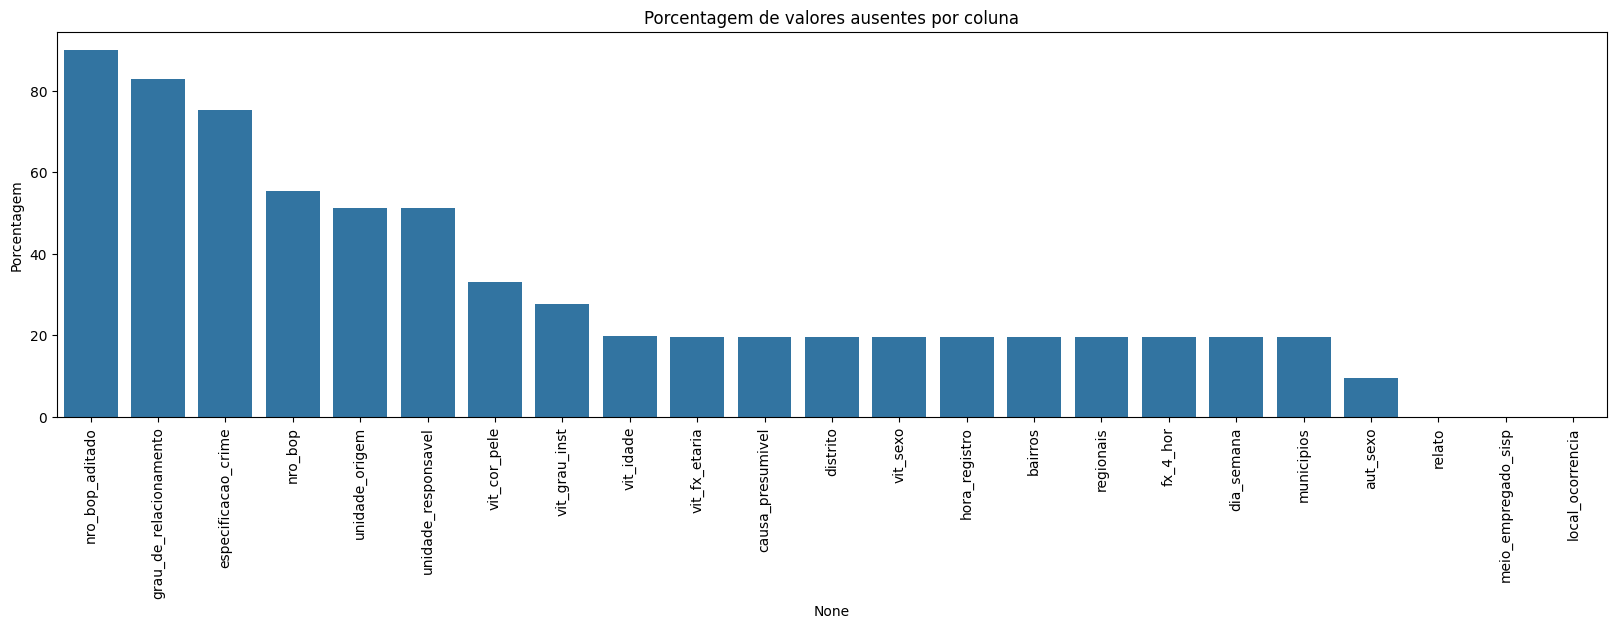

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia", "consolidado", "causa_presumivel", "vit_sexo", "relato" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes. As colunas vit_idade e vit_fx_etaria serão usadas posteriormente para tratamento da coluna vit_fx_etaria, portanto não é interessante a remoção de linhas nesta etapa.

In [35]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "relato"
], inplace=True)

In [36]:
crimes_df.reset_index(drop=True, inplace=True)

In [37]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

,dtypes,Absoluto,Porcentagem
nro_bop_aditado,object,566603,89.969687
grau_de_relacionamento,object,521690,82.838047
especificacao_crime,object,473280,75.151126
nro_bop,object,349471,55.491758
unidade_origem,object,322497,51.208614
unidade_responsavel,object,322497,51.208614
vit_cor_pele,object,208549,33.115053
vit_grau_inst,object,174982,27.785020
vit_idade,float64,124145,19.712721
vit_fx_etaria,object,123926,19.677946


Salvando as alterações em um novo dataframe

In [38]:
crimes_df.to_csv("C:\\Users\\mapin\\Documents\\crimes_selecionados_pará(2019-2024).csv", index=False)

In [39]:
crimes_selecionados_pará = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_selecionados_pará(2019-2024).csv')

C:\Users\mapin\AppData\Local\Temp\ipykernel_14348\1162656585.py:1: DtypeWarning: Columns (0,1,2,3,5,10,12,15,16,17,18,19,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_selecionados_pará = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_selecionados_pará(2019-2024).csv')


### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [ ]:
nro_bop_aditado	
grau_de_relacionamento	
especificacao_crime	
nro_bop
unidade_origem	
unidade_responsavel

In [40]:
colunas_com_NaN = ["grau_de_relacionamento","especificacao_crime",
                   "unidade_responsavel","unidade_origem",
                   'nro_bop','nro_bop_aditado']
crimes_selecionados_pará.loc[:, colunas_com_NaN] = crimes_selecionados_pará.loc[:, colunas_com_NaN].fillna("Nao informado")

In [41]:
crimes_selecionados_pará.isnull().sum()

unidade_origem                 0
unidade_responsavel            0
dia_semana                123753
fx_4_hor                  123753
mes_fato                       0
municipios                122659
ano_fato                       0
data_fato                      0
consolidado                    0
especificacao_crime            0
causa_presumivel          123764
meio_empregado_sisp            0
bairros                   123753
local_ocorrencia               0
vit_idade                 124145
vit_fx_etaria             123926
vit_sexo                  123755
vit_cor_pele              208549
vit_grau_inst             174982
grau_de_relacionamento         0
relato                         0
aut_sexo                   60539
distrito                  123756
regionais                 123753
nro_bop_aditado                0
nro_bop                        0
hora_registro             123754
data_registro                  0
dtype: int64

### 2. Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

##### 2.1 Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- vit_sexo

In [42]:
crimes_selecionados_pará.vit_sexo.value_counts()

vit_sexo
F                  305684
M                  198645
PJ                    690
P                     649
PARDA                 230
NI                    103
BRANCA                  4
JL                      4
PRETA                   2
                        1
NEGRA                   1
O ESTADO                1
PJ, EP E OUTROS         1
PREJUDICADO             1
Name: count, dtype: int64

In [43]:
crimes_selecionados_pará[crimes_selecionados_pará['vit_sexo'] == 'BRANCA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
170713,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM,TER,18 |-- 24,JANEIRO,BELEM,2020,2020-01-14,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,GUAMA,RESIDENCIA PARTICULAR,37.0,ADULTO IV (35 A 64 ANOS),BRANCA,F,ENSINO MEDIO INCOMPLETO,Nao informado,"<p>Foi AGREDIDA FISICAMENTE e AMEAÇADA por seu esposo ELISEU DA SILVA MACIEL, rg.2591852, nascido no dia 28/05/76, filho de Amália Crisostomo da Silva Maciel, residente trav. Ezeriel Monico de Matos nº67-B-altos, bairro do guamá, entre 03 de outubro e rua Epitássio Pessoa,contato 9971 3991, com quem convive há 20 anos, tendo três filhos da relação (17, 12 e 08 anos de idade). Informa que o nacional apresenta o comportamento agressivo e já agrediu fisicamente por duas vezes e a ofende moralmente por qualquer motivo. Relata que o nacional está desempregado e é a declarante quem está provendo a família. No dia 14 de janeiro, Manara chegou em casa e o casal passou a se desentender, onde Eliseu estava se comunicando com uma mulher no whatsapp e Manara não aceitou e reclamou. O nacional ficou muito agressivo com a atitude da declarante e ela alegou que não iria ficar pagando as conta, enquando Eliseu ficava a desrespeitando dentro de casa. O nacional partiu para cima de Manara e e aplicou vários socos em, a atingindo na cabeça e no braço esquerdo a deixando com hematomas. O nacional foi contido pelo filho Daniel Costa Maciel, que conseguiu intervir e evitar que Manara ficasse ainda mais lesionada. O nacional a expulsou de casa e Manara insistiu em dormir no local e ele tentou agredi-la fisicamente novamente. O nacional ainda a ameaçou dizendo “SE TU FICAR AQUI EU POSSO FAZER ALGUMA COISA”-Textuais e a declarnate ficou com medo. Hoje pela manhã, o nacional tentou agredi-la novamente e disse “EU JÁ MANDEI TU IR EMBORA”-Textuais e quando chegou para o almoço falou novamente “OLHA EU JÁ TE FALEI TRES VEZES VAI EMBORA DAQUI, A MINHA FAMILIA NÃO GOSTA DE TI”-Textuais. Manara ficou medo e resolveu sair de casa e ficará abrigada na casa de seu irmão que fica localizada no CJ TAPAJÓS, RUA AÇORES Nº68-FUNDOS,BAIRRO DO TAPANÃ. A declarante não representa criminalmente contra seu esposo ELISEU DA SILVA MACIEL , não aceita abrigo público e não apresentou testemunhas.Quanto as meddias protetivas solicita: A proibição de o agressor em frequentar o endereço da ofendida; Aprobição de o agressor em se aproximar da ofendida;A proibição de o agressor em entrar em contato com a ofendida por qualquer meio de comunicação. Será solicitado exame de corpo de delito.</p>",M,BELEM,CAPITAL,Nao informado,00035/2020.100242-7,1970-01-01 22:22:00,2020-01-15
170736,PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP,PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP,SAB,06 |-- 12,JANEIRO,PARAUAPEBAS,2020,2020-01-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,BAIRRO CENTRAL,RESIDENCIA PARTICULAR,34.0,PREJUDICADO,BRANCA,F,NAO INFORMADO,COMPANHEIRO(A),"<p>Compareceu nesta Unidade Policial o relator acima qualificado como&nbsp;CABO da Polícia Militar lotado no 23º BPM de Parauapebas/PA para comunicar QUE: na manhã de hoje (11.01.2020-sábado) se encontrava de serviço em companhia do SD-HALLISON, quando por volta de 08h40min foram acionados pelo jovem EVERTON LUCAS, este informou que sua genitora a senhora ANTÔNIA CÉLIA SOARES DIAS, havia sido agredida pelo seu companheiro o nacional ERISVALDO SOUZA NASCIMENTO, ambos residentes no endereço CHÁCARA ÁRVORE VERDE, KM 17, BAIRRO PALMARES I, ZONA RURAL DE PARAUAPEBAS. QUE, segundo o filho da vítima o nacional ERISVALDO agrediu sua mãe com socos em seu ro

Nesta linha da base, é perceptivel o erro na transcrição das informações, visto que a coluna vit_cor_pel e vit_sexo estao com os valores trocados. Como se trata de um caso sobre violencia contra a mulher, será feita a correção.

In [44]:
condicao_sexo_cor = (crimes_selecionados_pará['vit_sexo'] == 'BRANCA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor, ['vit_sexo', 'vit_cor_pele']] = ['F', 'BRANCA']

In [ ]:
pd.set_option('display.max_colwidth', 30)   # Limita a largura da coluna
pd.set_option('display.width', 100)   # Aumenta largura total da tabela
pd.set_option('display.max_rows', 20)


In [53]:
crimes_selecionados_pará[crimes_selecionados_pará['vit_sexo'] == 'PARDA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
93164,DELEGACIA ESPECIALIZADA NO...,DELEGACIA ESPECIALIZADA NO...,DOM,12 |-- 18,JANEIRO,ANANINDEUA,2020,2020-01-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO INCOMPLETO,Nao informado,<p>A vítima acima qualific...,M,ANANINDEUA,METROPOLITANA,Nao informado,00305/2020.100065-2,1970-01-01 15:14:00,2020-01-12
94875,DELEGACIA ESPECIALIZADA NO...,DELEGACIA ESPECIALIZADA NO...,QUA,00 |-- 06,JANEIRO,CASTANHAL,2020,2020-01-01,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>Informa a relatora que ...,M,CASTANHAL,GUAMA,Nao informado,00461/2020.100005-6,1970-01-01 13:51:00,2020-01-03
96694,DELEGACIA ESPECIALIZADA NO...,DELEGACIA ESPECIALIZADA NO...,SAB,06 |-- 12,JANEIRO,CASTANHAL,2020,2020-01-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO FUNDAMENTAL COMPLETO,Nao informado,"<p>A relatora, comunica QU...",M,CASTANHAL,GUAMA,Nao informado,00461/2020.100025-7,1970-01-01 11:03:00,2020-01-23
96887,CREMACAO - 4ª SECCIONAL - ...,CREMACAO - 4ª SECCIONAL - ...,SAB,06 |-- 12,JANEIRO,BELEM,2020,2020-01-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO INCOMPLETO,Nao informado,<p>A Comunicante vem infor...,NaN,BELEM,CAPITAL,Nao informado,00003/2020.100167-0,1970-01-01 11:14:00,2020-01-11
96930,PEDREIRA - 10ª SECCIONAL -...,PEDREIRA - 10ª SECCIONAL -...,QUI,12 |-- 18,JANEIRO,BELEM,2020,2020-01-16,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO COMPLETO,EX-COMPANHEIRO(A),<p>A Sra. SILVIANNE RAMONY...,F,BELEM,CAPITAL,Nao informado,00011/2020.100412-7,1970-01-01 18:37:00,2020-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180914,DELEGACIA ESPECIALIZADA NO...,DELEGACIA ESPECIALIZADA NO...,DOM,12 |-- 18,JANEIRO,ITAITUBA,2020,2020-01-05,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO COMPLETO,Nao informado,<p>A sra.<b> SONEIDE FERRE...,M,ITAITUBA,TAPAJOS,Nao informado,00555/2020.100002-9,1970-01-01 11:38:00,2020-01-07
182736,SAO BRAS - 2º SECCIONAL -1...,TERRA FIRME - UNIDADE INTE...,SEX,18 |-- 24,JANEIRO,BELEM,2020,2020-01-31,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>A Cidadã acima identifi...,NaN,BELEM,CAPITAL,Nao informado,00002/2020.101736-5,1970-01-01 22:20:00,2020-01-31
182903,DIVISAO ESPECIALIZADA NO A...,DIVISAO ESPECIALIZADA NO A...,SEG,00 |-- 06,JANEIRO,BELEM,2020,2020-01-20,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO COMPLETO,Nao informado,<p>Foi AGREDIDA FISICAMENT...,NaN,BELEM,CAPITAL,Nao informado,00035/2020.100294-0,1970-01-01 09:43:00,2020-01-20
182917,DIVISAO ESPECIALIZADA NO A...,DIVISAO ESPECIALIZADA NO A...,DOM,00 |-- 06,JANEIRO,BELEM,2020,2020-01-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>///////////A declarante...,NaN,BELEM,CAPITAL,Nao informado,00035/2020.100169-0,1970-01-01 04:02:00,2020-01-12


Para tratar melhor as linhas com 'PARDA' na coluna 'vit_sexo', serão excluidos as linhas em que a vitima não é do sexo feminino e os valores 'JL', 'JA LANCADO', 'P', 'NI', 'PJ, EP E OUTROS', 'PREJUDICADO' E 'PJ'

In [54]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PJ'].index, inplace=True)

In [55]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='M'].index, inplace=True)

In [56]:
crimes_selecionados_pará = crimes_selecionados_pará[
    ~((crimes_selecionados_pará['vit_sexo'] == 'PARDA') & (crimes_selecionados_pará['vit_cor_pele'] == 'M'))
]


In [57]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='P'].index, inplace=True)

In [58]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PRETA'].index, inplace=True)

In [59]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='JL'].index, inplace=True)

In [60]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='NI'].index, inplace=True)

In [61]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='JA LANCADO'].index, inplace=True)

In [62]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']==' '].index, inplace=True)

In [63]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PJ, EP E OUTROS'].index, inplace=True)

In [64]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PREJUDICADO'].index, inplace=True)

In [65]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='JA LANCADO'].index, inplace=True)

In [66]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PESSOA JURIDICA'].index, inplace=True)

In [67]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='O ESTADO'].index, inplace=True)

In [68]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PJ, PE E OUTROS'].index, inplace=True)

In [69]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='PJ, EP E OUTROS_x000D_\n'].index, inplace=True)

In [70]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_sexo']=='JA LANCADO '].index, inplace=True)

In [71]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [72]:
crimes_selecionados_pará.vit_sexo.value_counts()

vit_sexo
F        305688
PARDA       204
NEGRA         1
Name: count, dtype: int64

In [73]:
condicao_sexo_cor_1 = (crimes_selecionados_pará['vit_sexo'] == 'PARDA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PARDA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [74]:
condicao_sexo_cor_2 = (crimes_selecionados_pará['vit_sexo'] == 'PRETA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor_2, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PRETA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [75]:
condicao_sexo_cor_3 = (crimes_selecionados_pará['vit_sexo'] == 'NEGRA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor_3, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PRETA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [76]:
condicao_sexo_cor_4 = (crimes_selecionados_pará['vit_sexo'] == 'PARDA') & (crimes_selecionados_pará['vit_cor_pele'] == 'M')
crimes_selecionados_pará.loc[condicao_sexo_cor_4, ['vit_sexo', 'vit_cor_pele']] = ['M', 'PARDA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [77]:
crimes_selecionados_pará.vit_sexo.value_counts()

vit_sexo
F    305893
Name: count, dtype: int64

- vit_cor_pele

In [78]:
crimes_selecionados_pará.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO        213573
NAO INFORMADO       32086
PARDA                8093
BRANCA                491
PRETA                 394
INDIGENA               14
AMARELA                 5
PJ, EP E OUTROS         4
JA LANCADO              1
Name: count, dtype: int64

In [79]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_cor_pele == "Nao informado",'vit_cor_pele']= 'PREJUDICADO'

In [80]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_cor_pele == "NAO INFORMADO",'vit_cor_pele']= 'PREJUDICADO'

In [81]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_cor_pele']=='M'].index, inplace=True)

In [82]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_cor_pele']=='PJ, EP E OUTROS'].index, inplace=True)

In [83]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_cor_pele']=='JA LANCADO'].index, inplace=True)

In [84]:
crimes_selecionados_pará[crimes_selecionados_pará['vit_cor_pele'] == 'F']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro


In [85]:
condicao_sexo_cor_2 = (crimes_selecionados_pará['vit_sexo'] == 'PRETA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PRETA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [86]:
condicao_sexo_cor_2 = (crimes_selecionados_pará['vit_sexo'] == 'NEGRA') & (crimes_selecionados_pará['vit_cor_pele'] == 'F')
crimes_selecionados_pará.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PRETA']
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [87]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [88]:
crimes_selecionados_pará.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO    245659
PARDA            7889
PRETA             598
BRANCA            491
INDIGENA           14
AMARELA             5
Name: count, dtype: int64

- local_ocorrencia

In [89]:
local_ocorrencia_unico = crimes_selecionados_pará["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  127


['RESIDENCIA PARTICULAR',
 'VIA PUBLICA',
 'INTERNET',
 'CAFE,BAR,ETC',
 'OUTROS',
 'PENITENCIARIA, REFORMATORIO',
 'HOSPITAL',
 'CASA DE TOLERANCIA',
 'ESTABELECIMENTO DE ENSINO',
 'CASA COMERCIAL',
 'LOGRADORO PUBLICO',
 'CONDOMINIO RESIDENCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'TERRENO BALDIO',
 'EDIFICIO PUBLICO',
 'CRECHE',
 'CONDOMINIO COMERCIAL',
 'CARRO FORTE',
 'MAR, RIO, LAGOA',
 'HOTEL, PENSAO, ETC',
 'TRANSPORTE',
 'HABITACAO COLETIVA',
 'PROPRIEDADE AGROPASTORIL',
 'ESTABELECIMENTO BANCARIO',
 'LOJAS DE CONVENIENCIA',
 'PREDIO EM OBRAS',
 'PENITENCIARIA',
 'VIA FERREA',
 'RESIDENCIA PARTICULAR ',
 'BAR',
 'REDIDENCIA PARTICULAR ',
 'OUTROS ESTADOS',
 'CAIXA ELETRONICO',
 'POSTO DE GASOLINA ',
 'PROSTIBULO',
 'SUPERMERCADO ',
 'VIA PUBLICA ',
 'OUTROS PAISES',
 'CLINICA',
 'RESIDENCIA',
 'HOSPITAL GERAL PENITENCIARIO DE AMERICANO ',
 'CLINICA ',
 'ALDEIA INDIGINA',
 'INDUSTRIA',
 'TRANSPORTE ',
 'NAO INFORMADO ',
 'PRESIDIARIO ',
 'REDIDENCIA PARTICULAR',
 'POSTO DE 

In [90]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [91]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "LOGRADORO PUBLICO",'local_ocorrencia'] = 'VIA PUBLICA'

In [92]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [93]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [94]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [95]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [96]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "TRANSPORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [97]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [98]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [99]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [100]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [101]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [102]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [103]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [104]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [105]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [106]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [107]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [108]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [109]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [110]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [111]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [112]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [113]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [114]:
crimes_selecionados_pará .loc[crimes_selecionados_pará.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [115]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [116]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia =="CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [117]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [118]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [119]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [120]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia =="AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [121]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [122]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CAFE,BAR,ETC",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [123]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "CAFE, BAR, RESTAURANTE",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [124]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia =="BAR",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [125]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia =="OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [126]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.local_ocorrencia == "OUTROS",'local_ocorrencia'] = 'OUTROS LOCAIS'

In [127]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
    'RESIDENCIA PARTICULAR', 'REDIDENCIA PARTICULAR', 'RESIDENCIA PARTICILAR', 
    'RESIDENCIA PARTICULAR ', 'REDSDENCIA PARTICULAR', 'RESIDECIA PARTICULAR', 
    'REISDENCIA PARTICULAR', 'RESIDENCIA PERTICULAR', 'EM RESIDENCIA'
]), 'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [128]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
    'INTERNET', 'AMBIENTE VIRTUAL', 'AMBIENTE VIRTUAL (PIX)', 'AMBIENTE VIRTUAL (NTERNET)', 
    'AMBIENTE VIRTUAL (REDE SOCIAL)', 'AMBIENTE VIERTUAL (INTERNET)', 'AMBIENTE VITUAL (INTERNET)'
]), 'local_ocorrencia'] = 'INTERNET'

In [129]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
    'TRANSPORTE(PUBLICO, URBANO, ETC)', 'TRANSPORTE URBANO', 'TRANSPORTE PUBLICO', 
    'TRANSPORTE COLETVIO', 'TRASPORTE COLETIVO', 'TRANSPORTE COLETIVO', 'TRANSPOSTE PUBLICO',
     'EM COLETIVO', 'COLETIVO'
]), 'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [130]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
    'HOSPITAL', 'HOSPITAL ', 'UNIDADE DE SAUDE', 'POSTO DE SAUDE', 
    'POSTO DE SAUDE ', 'ESTABELECIMENTOS DE SAUDE'
]), 'local_ocorrencia'] = 'ESTABELECIMENTOS DE SAUDE'

In [131]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
    'ESTABELECIMENTO COMERCIAL', 'LOJA', 'LOJA ', 'SUPERMERCADO', 'MERCADINHO', 
    'LOJA DE CONVENIENCIA', 'LOJA DE CONVENIENCIA ', 'CASA COMERCIAL', 'FARMACIA',
     'FARMACIA ', 'PANIFICADORA', 'PANIFICADORA ', 'BARBEARIA', 'POSTO DE GASOLINA', 
     'POSTO DE GASOLINA ', 'SALAO DE BELEZA', 'SALAO DE BELEZA ', 'RESTAURANTE', 'RESTAURANTE ', 
     'PIZZARIA', 'PIZZARIA ', 'ACADEMIA', 'ACADEMIA ', 'CLINICA', 'CONSULTORIO', 'OTICA', 
     'DEPOSITO', 'DEPOSITO ', 'DEPOSITO DE GAS ', 'DEPOSITO DE CERVEJA ', 'DEPOSITO DE BEBIDAS'
]), 'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [132]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
  'CONDOMINIO RESIDENCIAL', 'CONDOMINIO COMERCIAL', 'CONDOMINIO'
]), 'local_ocorrencia'] = 'CONDOMINIO'

In [133]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
  'PROPRIEDADE AGROPASTORIL', 'FAZENDA', 'FAZENDA ', 'SITIO', 'SITIO ', 'CHACARA', 'CHACARA '
]), 'local_ocorrencia'] = 'AREAS RURAIS'

In [134]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['local_ocorrencia'].isin([
   'MAR, RIO, LAGOA', 'MAR, RIO E LAGOA', 'MAR,RIO,LAGOA', 'MAR, RIO E LAGOA_x000D_'
]), 'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [135]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [136]:
novo_local_ocorrencia_unico = crimes_selecionados_pará["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 83


array(['RESIDENCIA PARTICULAR', 'VIA PUBLICA', 'INTERNET',
       'CAFE, BAR, RESTAURANTE, ETC', 'OUTROS LOCAIS',
       'PENITENCIARIA, REFORMATORIO', 'ESTABELECIMENTOS DE SAUDE',
       'LOCAL DE PROSTITUICAO', 'ESTABELECIMENTO DE ENSINO',
       'ESTABELECIMENTO COMERCIAL', 'CONDOMINIO', 'PREDIO',
       'TERRENO BALDIO', 'EDIFICIO PUBLICO', 'CRECHE', 'CARRO FORTE',
       'MAR, RIO, LAGOA', 'HOTEL, PENSAO, ETC',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'HABITACAO COLETIVA',
       'AREAS RURAIS', 'ESTABELECIMENTO BANCARIO', 'PENITENCIARIA',
       'ESTACAO FERROVIARIA', 'REDIDENCIA PARTICULAR ', 'OUTROS ESTADOS',
       'CAIXA ELETRONICO', 'OUTROS PAISES',
       'HOSPITAL GERAL PENITENCIARIO DE AMERICANO ', 'ALDEIA INDIGINA',
       'ESTABELECIMENTO INDUSTRIAL', 'NAO INFORMADO ', 'PRESIDIARIO ',
       'DELEGACIA DE BREVES', 'ACOLHIMENTO REVIVER', 'NAO INFORMADO',
       'MOTEL', 'CASA EM CONSTRUCAO', 'HOTEL', 'CASA DE SHOW',
       'LANCHONETE', 'CASA DE ABRIGO E ASSISTENCIA', 

- Grau de relacionamento

In [137]:
grau_de_relac_unico = crimes_selecionados_pará["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 115


array(['FILHO(A)', 'NAO INFORMADO', 'Nao informado', 'CUNHADO(A)',
       'EX-COMPANHEIRO(A)', 'COMPANHEIRO(A)', 'NAMORADO(A)', 'PAI',
       'PRIMO(A)', 'PADRASTO', 'TIO(A)', 'IRMAO(A)', 'VIZINHO(A)',
       'AMIGO(A)', 'AVO', 'CONHECIDO(A)', 'NETO(A)', 'SOGRO(A)',
       'EX-PADASTRO', 'SOBRINHO(A)', 'GENRO', 'MAE', 'EX-PADRASTO',
       'EX-NAMORADO(A)', 'PADRINHO', 'ENTEADO(A)', 'EX-CUNHADO(A)',
       'MADRASTA', 'BISAVO', 'EX-NORA', 'ESPOSO(A)', 'EX-SOGRO(A)',
       'NORA', 'PARENTESCO POR AFINIDADE', 'PREJUDICADO',
       'PJ, EP E OUTROS', 'EX-MADRASTA', 'EX-GENRO', 'C',
       'EX - SOGRO (A)', 'MARIDO', 'FILHO', 'TIO', 'NETO', 'PRIMA',
       'MADRINHA', 'PAI DO PADRASTO', 'CHEFE', 'PARENTE POR AFINIDADE',
       'PROFESSOR(A)', 'EX-ENTEADO(A)', 'POR AFINIDADE', 'EX-SOGRO',
       'EX SOGRO(A)', 'EX NORA', 'EX-GENRO(A)', 'TIO(A', 'BISAVO(A)',
       'CUNH0', 'FILHO (A)', 'TIO-AVO', 'EX-AMANTE', 'EX-CUNHADA',
       'EX CUNHADO(A)', 'EX-SOGRO (A)', 'EX-SOGRA', 'EX COMPANHEIRO

In [138]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [139]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "AVO",'grau_de_relacionamento'] =  'AVO(A)'

In [140]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "FILHO",'grau_de_relacionamento'] =  'FILHO(A)'

In [141]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [142]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento =="TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [143]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [144]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [146]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [145]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [147]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "PADASTRO",'grau_de_relacionamento'] =  'PADRASTO'

In [148]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [149]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "PREJUDICADOQ",'grau_de_relacionamento'] =  'PREJUDICADO'

In [150]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento =="EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [151]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [152]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'FILHO (A)', 'FILHO(A)', 'FILHA'
]), 'grau_de_relacionamento'] = 'FILHO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'NAO', 'NAO INFORMADO', 'DESCONHECIDO(A)',
 'PREJUDICADO', 'PREJUDCIADO',  'PERJUDICADO',  'PREJUDICAOD', '66666'
]), 'grau_de_relacionamento'] = 'NAO INFORMADO'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX COMPANHEIRO', 'EX-COMPANHEIRO', 'ERICK SANTOS SOUSA',
    'EX COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)]','EX'

]), 'grau_de_relacionamento'] = 'EX-COMPANHEIRO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'CONPANHEIRO(A)', 'ESPOSO(A)', 'UNIAO ESTAVEL', 'MARIDO'
]), 'grau_de_relacionamento'] = 'COMPANHEIRO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'NAMARADO(A)', 'NAMORADO(A)', 'NAMORADO'
]), 'grau_de_relacionamento'] = 'NAMORADO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'PRIM', 'PRIMO', 'PRIMO(A)'
]), 'grau_de_relacionamento'] = 'PRIMO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'TIO-AVO', 'TIO(A)','TIA'
]), 'grau_de_relacionamento'] = 'TIO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'IRMAO', 'IRM', 'IRMAO(A)','IRMAO(A0'
]), 'grau_de_relacionamento'] = 'IRMAO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-VIZINHO(A)', 'VIZINHO(A)','S'
]), 'grau_de_relacionamento'] = 'VIZINHO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'BISAVO', 'BISAVO(A)', 'AVO(A)'
]), 'grau_de_relacionamento'] = 'AVO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-CUNHADO', 'EX-CUNHADO(A)', 'CUNHADO', 'CUNHADO(A)', 'EX CUNHADO(A)', 'CUNH0',
     'EX-CUNHADO (A)',  'EX-CUNHDO (A)'
]), 'grau_de_relacionamento'] = 'CUNHADO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-SOGRO (A)', 'EX-SOGRO', 'EX - SOGRO (A)', 'EX SOGRO(A)', 'EX- SOGRO(A)', 'EX SOGRA'
]), 'grau_de_relacionamento'] = 'EX-SOGRO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'PARANTESCO POR AFINIDADE', 'PARENTENTESCO POR AFINIDADE', 'PARENESCO POR AFINIDADE', 
    'PARENTESCO POR AFINIADE', 'PARENTESCO POR AFINADADE',  'PARENTESCO POR AFINIDADE',  
    'PARENTESCO POR AFINDADE',  'POR AFINIDADE','PARENTESCO POR AFINIIDADE'
]), 'grau_de_relacionamento'] = 'PARENTESCO POR AFINIDADE'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'NETO', 'NETA', 'NETO(A)', 'NATO(A)'
]), 'grau_de_relacionamento'] = 'NETO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-NORA', 'EX NORA'
]), 'grau_de_relacionamento'] = 'EX-NORA'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-GENRO', 'EX-GENRO(A)'
]), 'grau_de_relacionamento'] = 'EX-GENRO'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'CONHECIDO', 'CONHECIDO(A)'
]), 'grau_de_relacionamento'] = 'CONHECIDO(A)'

crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'EX-NAMORADO'
]), 'grau_de_relacionamento'] = 'EX-NAMORADO(A)'
crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento'].isin([
    'PARDA'
]), 'grau_de_relacionamento'] = 'PADASTRO'

In [153]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
62908,MARAMBAIA - 5ª SECCIONAL -...,MARAMBAIA - 5ª SECCIONAL -...,QUI,12 |-- 18,NOVEMBRO,BELEM,2020,2020-11-05,HOMICIDIO CULPOSO,ERRO MEDICO,...,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",<p>A relatora vem a esta s...,PJ,BELEM,CAPITAL,Nao informado,00006/2020.108898-5,1970-01-01 11:32:00,2020-11-13
65917,DELEGACIA DE CONTROLE DE C...,CIDADE NOVA - 3ª SECCIONAL...,DOM,18 |-- 24,NOVEMBRO,ANANINDEUA,2020,2020-11-01,LESAO CORPORAL CULPOSA,QUEDA DA PROPRIA ALTURA,...,ENSINO FUNDAMENTAL COMPLETO,"PJ, EP E OUTROS",<p>O Cidadão acima qualifi...,PJ,ANANINDEUA,METROPOLITANA,Nao informado,00331/2020.100747-1,1970-01-01 19:51:00,2020-11-06
92513,XINGUARA - DELEGACIA DE PO...,XINGUARA - DELEGACIA DE PO...,SAB,00 |-- 06,DEZEMBRO,XINGUARA,2020,2020-12-12,LESAO CORPORAL,NAO INFORMADO,...,ENSINO SUPERIOR COMPLETO,"PJ, EP E OUTROS","<p>A relatora, acima ident...",PJ,XINGUARA,ALTO XINGU,Nao informado,00215/2020.101754-3,1970-01-01 12:01:00,2020-12-15
100878,URUARA - DELEGACIA DE POLI...,URUARA - DELEGACIA DE POLI...,SAB,00 |-- 06,NOVEMBRO,URUARA,2020,2020-11-28,LESAO CORPORAL,Nao informado,...,ENSINO FUNDAMENTAL INCOMPLETO,"PJ, EP E OUTROS",<p>A nacional acima qualif...,PJ,URUARA,XINGU,Nao informado,00141/2020.101051-3,1970-01-01 17:31:00,2020-11-30
112197,Nao informado,Nao informado,TER,06 |-- 12,MARCO,BELEM,2021,2021-03-23,LESAO CORPORAL,ERRO MEDICO,...,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",<P>A CIDADA ACIMA IDENTIFI...,PJ,BELEM,CAPITAL,Nao informado,00006/2021.102014-0,11:44:00,2021-03-24
157344,Nao informado,Nao informado,QUI,18 |-- 24,FEVEREIRO,ANANINDEUA,2021,2021-02-18,LESAO CORPORAL,NAO INFORMADO,...,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",<P><B>A RELATORA ACIMA QUA...,PJ,ANANINDEUA,METROPOLITANA,Nao informado,00004/2021.101327-2,10:53:00,2021-02-23
166254,Nao informado,Nao informado,QUA,00 |-- 06,FEVEREIRO,BELEM,2021,2021-02-03,LESAO CORPORAL,NEGLIGENCIA MEDICA,...,ENSINO SUPERIOR COMPLETO,"PJ, EP E OUTROS",<P>A CIDADA ACIMA QUALIFIC...,PJ,BELEM,CAPITAL,Nao informado,00002/2021.101507-8,15:27:00,2021-02-23


As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [154]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

Verificando inconsistencias na coluna do autor do crime de acordo com o grau de relacionamento que é "PAI"

In [155]:
pd.set_option('display.max_columns', 20)  # Mostra até 20 colunas (ajuste conforme necessário)
pd.set_option('display.width',80)       # Largura total da tabela no terminal
pd.set_option('display.max_colwidth',25)  #imita a largura de cada coluna para 20 caracteres


In [156]:
df_filtrado = crimes_selecionados_pará[(crimes_selecionados_pará['grau_de_relacionamento'] == 'PAI') & (crimes_selecionados_pará['aut_sexo'] == 'F')]
df_filtrado

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
100150,SANTA IZABEL DO PARA ...,SANTA IZABEL DO PARA ...,TER,12 |-- 18,MARCO,SANTA IZABEL DO PARA,2020,2020-03-24,AMEACA,VIOLENCIA DOMESTICA,...,NAO INFORMADO,PAI,<p>A relatora que é c...,F,SANTA IZABEL DO PARA,GUAMA,(NULL),00076/2020.100798-8,1970-01-01 20:47:00,2020-03-24
101080,DELEGACIA DE PROTECAO...,DELEGACIA DE PROTECAO...,SEG,12 |-- 18,OUTUBRO,BELEM,2020,2020-10-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,NAO INFORMADO,PAI,<p>O relator em epígr...,F,BELEM,CAPITAL,Nao informado,00275/2020.100097-0,1970-01-01 13:32:00,2020-10-13
101689,DELEGACIA ESPECIALIZA...,DELEGACIA ESPECIALIZA...,QUA,06 |-- 12,NOVEMBRO,CASTANHAL,2020,2020-11-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,NAO INFORMADO,PAI,<p>///&nbsp; Relata q...,F,CASTANHAL,GUAMA,Nao informado,00554/2020.100109-0,1970-01-01 11:53:00,2020-11-11
114894,Nao informado,Nao informado,SEG,12 |-- 18,MARCO,SANTAREM,2021,2021-03-08,ESTUPRO DE VULNERAVEL,MENOR/VIOLENCIA DOMES...,...,ENSINO FUNDAMENTAL IN...,PAI,<P>//////A SENHORA GE...,F,SANTAREM,BAIXO AMAZONAS,Nao informado,00553/2021.100085-6,16:32:00,2021-03-08
119335,Nao informado,Nao informado,QUA,18 |-- 24,JUNHO,QUATIPURU,2021,2021-06-02,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,NAO INFORMADO,PAI,<P>A NACIONAL ACIMA Q...,F,QUATIPURU,CAETE,Nao informado,00193/2021.100151-4,23:12:00,2021-06-02
124332,Nao informado,Nao informado,SEG,18 |-- 24,MAIO,IRITUIA,2021,2021-05-10,ESTUPRO DE VULNERAVEL,MENOR/VIOLENCIA DOMES...,...,NAO INFORMADO,PAI,<P>A RELATORA COMPARE...,F,IRITUIA,GUAMA,Nao informado,00177/2021.100231-0,10:41:00,2021-07-26
167288,Nao informado,Nao informado,QUA,06 |-- 12,MAIO,BELEM,2022,2022-05-18,ESTUPRO DE VULNERAVEL,MENOR/VIOLENCIA DOMES...,...,PREJUDICADO,PAI,<P>A RELATORA ACIMA Q...,F,ICOARACI,CAPITAL,Nao informado,Nao informado,1970-01-01 10:35:00,2022-05-25 00:00:00
187442,Nao informado,Nao informado,DOM,12 |-- 18,SETEMBRO,CONCEICAO DO ARAGUAIA,2022,2022-09-25,LESAO CORPORAL,VIOLENCIA DOMESTICA,...,ENSINO MEDIO COMPLETO,PAI,<P><B>LESAO CORPORAL ...,F,CONCEICAO DO ARAGUAIA,ARAGUAIA,Nao informado,Nao informado,1970-01-01 16:38:00,2022-09-25 00:00:00


Para tratar esta incosistencia entre o sexo do autor e parentesco atribuido iremos verificar o relato da pessoa que realizou a denuncia

In [157]:
texto_lista = df_filtrado['relato'].to_list()
for texto in texto_lista:
    print(texto)

<p>A relatora que é conselheira tutela acima identificada vem informar nesta unidade policial que em dia e hora acima citado, que esta acompanhando a adolescente SUZANY MARINHO D EOLIVEIRA, nascida em 30/04/2006 com 13 anos, com sofreu suposta ameaça do seu genitor ANTONIO CHARLES BEZERRA DE OLIVEIRA com palavras textuais: “SE ELA CONTINUASSE QUERER PREJUDICÁ-LO IRIA JOGAR NO BURACO”. Assim a relatora informa que a adolescente está sofrendo abalos psicológicos e com temor em relação a esta situação, QUE adoelscente ficará na casa de acolhimento do municipio. Registra para as devidas providências legais. //////////</p>
<p>O relator em epígrafe é tio paterno da adolescente <b>TAIS&nbsp;DA CONCEIÇÃO SANTANA</b>, 12 anos que teria sido agredida fisicamente pelo genitor TIAGO DE OLIVEIRA SANTANA e pela madrasta ALIRIA REIS ARAUJO; QUE há aproximadamente três meses os fatos vêm ocorrendo, na casa onde a adoelscente mora, pois apesar de TIAGO e ALIRIA não residirem no msmso local, têm livre a

Nos dois relatos e possivel observar que se trata de um autor do sexo masculino, logo a alteração na coluna "aut_sexo" se faz necessaria.

In [158]:
crimes_selecionados_pará.loc[(crimes_selecionados_pará['grau_de_relacionamento'] == 'PAI') & (crimes_selecionados_pará['aut_sexo'] == 'F'), 'aut_sexo'] = 'M'

Exclusão de linhas com valores sem sentido

In [159]:
crimes_selecionados_pará = crimes_selecionados_pará[
    ~crimes_selecionados_pará['grau_de_relacionamento'].isin([
        '00531/2023.100070-6', 
        '1º GRAU COMPLETO (ENSINO FUNDAMENTAL)'
    ])
]


In [160]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [161]:
novo_grau_de_relac_unico = crimes_selecionados_pará["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['FILHO(A)', 'NAO INFORMADO', 'CUNHADO(A)', 'EX-COMPANHEIRO(A)',
       'COMPANHEIRO(A)', 'NAMORADO(A)', 'PAI', 'PRIMO(A)', 'PADRASTO',
       'TIO(A)', 'IRMAO(A)', 'VIZINHO(A)', 'AMIGO(A)', 'AVO(A)',
       'CONHECIDO(A)', 'NETO(A)', 'SOGRO(A)', 'EX-PADRASTO',
       'SOBRINHO(A)', 'GENRO', 'MAE', 'EX-NAMORADO(A)', 'PADRINHO',
       'ENTEADO(A)', 'MADRASTA', 'EX-NORA', 'EX-SOGRO(A)', 'NORA',
       'PARENTESCO POR AFINIDADE', 'EX-MADRASTA', 'EX-GENRO', 'C',
       'MADRINHA', 'PAI DO PADRASTO', 'CHEFE', 'PROFESSOR(A)',
       'EX-ENTEADO(A)', 'EX-AMANTE', 'EX-CHEFE', 'AFILHADO(A)',
       'PADASTRO'], dtype=object)

- vit_fx_etaria	

In [162]:
vit_fx_etaria_unico = crimes_selecionados_pará["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 11


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)              229836
ADULTO I (18 A 24 ANOS)                74329
ADULTO III (30 A 34 ANOS)              71333
ADULTO II (25 A 29 ANOS)               68806
ADOLESCENTE (12 A 17 ANOS)             20481
IDOSO (65 ANOS OU MAIS)                15960
PREJUDICADO                            11873
CRIANCA (0 A 11 ANOS)                  10962
NAO INFORMADO                           1656
PJ, EP E OUTROS                          591
ADULTO IV (35 A 64 ANOS)_x000D_\n          5
ADULTO I (DE 18 A 24 ANOS)                 4
ADULTO III (30 A 34 ANOS)_x000D_\n         3
ADULTO I (18 A 24 ANOS)_x000D_\n           3
JA LANCADO                                 2
PJ,EP E OUTROS                             1
Name: count, dtype: int64

In [163]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_fx_etaria']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
106646,VISEU - UNIDADE POLI...,VISEU - UNIDADE POLI...,SEG,06 |-- 12,DEZEMBRO,VISEU,2020,2020-12-21,LESAO CORPORAL,NAO INFORMADO,...,NaN,NAO INFORMADO,A NACIONAL ACIMA IDEN...,F,VISEU,CAETE,/.-,198/2020.000771-0,1970-01-01 09:01:00,2020-12-21
107757,DEAM - DEL.VIRTUAL DA...,DEAM - DEL.VIRTUAL DA...,SEG,12 |-- 18,DEZEMBRO,BELEM,2020,2020-12-21,AMEACA,Nao informado,...,NAO INFORMADO,NAO INFORMADO,O RELATOR ACIMA QUALI...,NaN,BELEM,CAPITAL,/.-,294/2020.002488-6,1970-01-01 17:46:00,2020-12-21
107758,VISEU - UNIDADE POLI...,VISEU - UNIDADE POLI...,TER,12 |-- 18,DEZEMBRO,VISEU,2020,2020-12-01,LESAO CORPORAL,NAO INFORMADO,...,NaN,NAO INFORMADO,A RELATORA COMPARECE ...,F,VISEU,CAETE,/.-,198/2020.000718-0,1970-01-01 15:56:00,2020-12-01
108827,Nao informado,Nao informado,TER,06 |-- 12,JANEIRO,PORTEL,2021,2021-01-05,AMEACA,VIOLENCIA DOMESTICA,...,"PJ, EP E OUTROS",FILHO(A),O RELATOR ACIMA QUALI...,F,PORTEL,MARAJO OCIDENTAL,Nao informado,294/2022.000039-9,01:28:00,2022-01-07
172708,Nao informado,Nao informado,QUA,06 |-- 12,MARCO,ANANINDEUA,2022,2022-03-09,AMEACA,Nao informado,...,ENSINO FUNDAMENTAL IN...,NAO INFORMADO,<P>A RELATORA COMPARE...,P,ANANINDEUA,METROPOLITANA,Nao informado,Nao informado,1970-01-01 15:09:59.9...,2022-03-10 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224386,Nao informado,Nao informado,SEX,12 |-- 18,AGOSTO,ALENQUER,2022,2022-08-26,DIFAMACAO,Nao informado,...,PREJUDICADO,NAO INFORMADO,O RELATOR ACIMA QUALI...,P,ALENQUER,BAIXO AMAZONAS,Nao informado,Nao informado,1970-01-01 12:03:00,2022-08-29 00:00:00
226677,Nao informado,Nao informado,DOM,06 |-- 12,AGOSTO,TOME-ACU,2022,2022-08-28,AMEACA,Nao informado,...,ENSINO FUNDAMENTAL IN...,NAO INFORMADO,<P>INFORMA QUE E CASA...,P,TOME-ACU,GUAMA,Nao informado,Nao informado,1970-01-01 09:05:00,2022-08-29 00:00:00
227375,Nao informado,Nao informado,SEX,06 |-- 12,AGOSTO,SANTA IZABEL DO PARA,2022,2022-08-26,AMEACA,Nao informado,...,ENSINO SUPERIOR COMPLETO,NAO INFORMADO,<P>O RELATOR ACIMA QU...,P,SANTA IZABEL DO PARA,GUAMA,Nao informado,Nao informado,1970-01-01 10:26:00,2022-08-29 00:00:00
227550,Nao informado,Nao informado,SEX,12 |-- 18,AGOSTO,ITAITUBA,2022,2022-08-26,AMEACA,Nao informado,...,ENSINO FUNDAMENTAL CO...,NAO INFORMADO,<P>A RELATORA ACIMA Q...,P,ITAITUBA,TAPAJOS,Nao informado,Nao informado,1970-01-01 15:28:00,2022-08-29 00:00:00


In [164]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [165]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_fx_etaria']=='PREJUDICADO']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
26,BENEVIDES - DELEGACIA...,BENEVIDES - DELEGACIA...,DOM,12 |-- 18,FEVEREIRO,BENEVIDES,2019,2019-02-10,LESAO CORPORAL,VIOLENCIA DOMESTICA/M...,...,NaN,NAO INFORMADO,<p>Compareceu nesta D...,NI,BENEVIDES,METROPOLITANA,Nao informado,00032/2019.100360-2,1970-01-01 17:31:00,2019-02-10
53,ORIXIMINA - UNIDADE P...,ORIXIMINA - UNIDADE P...,DOM,00 |-- 06,JANEIRO,ORIXIMINA,2019,2019-01-13,HOMICIDIO,NAO INFORMADO,...,NaN,NAO INFORMADO,"O POLICIAL MILITAR, A...",M,ORIXIMINA,BAIXO AMAZONAS,Nao informado,105/2019.000100-6,1970-01-01 10:07:00,2019-01-13
80,MARABA - 21ª SECCIONA...,MARABA - 21ª SECCIONA...,DOM,06 |-- 12,DEZEMBRO,MARABA,2019,2019-12-15,LESAO CORPORAL,VIOLENCIA DOMESTICA/M...,...,NAO INFORMADO,COMPANHEIRO(A),<p>O relator na quali...,M,MARABA,CARAJAS,Nao informado,00184/2019.109648-5,1970-01-01 06:44:00,2019-12-15
103,CIDADE NOVA - 3ª SECC...,CIDADE NOVA - 3ª SECC...,QUA,12 |-- 18,OUTUBRO,ANANINDEUA,2019,2019-10-02,ESTUPRO,NAO INFORMADO,...,NAO INFORMADO,NAO INFORMADO,<p>A relatora qualifi...,M,ANANINDEUA,METROPOLITANA,Nao informado,00004/2019.114216-0,1970-01-01 12:10:00,2019-10-08
144,DIVISAO DE HOMICIDIOS,DIVISAO DE HOMICIDIOS,SEG,18 |-- 24,JUNHO,BELEM,2019,2019-06-17,HOMICIDIO,EM DECOMPOSICAO,...,NAO INFORMADO,NAO INFORMADO,<p>&nbsp;A quipe de p...,NI,BELEM,CAPITAL,Nao informado,00486/2019.100290-2,1970-01-01 07:38:00,2019-06-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305728,Nao informado,Nao informado,QUA,12 |-- 18,ABRIL,PARAUAPEBAS,2023,2023-04-26,LESAO CORPORAL,Nao informado,...,PREJUDICADO,NAO INFORMADO,<P>QUE NA QUALIDADE D...,M,PARAUAPEBAS,CARAJAS,Nao informado,Nao informado,1970-01-01 19:09:00,2023-04-26 00:00:00
305737,Nao informado,Nao informado,DOM,06 |-- 12,JANEIRO,PARAUAPEBAS,2023,2023-01-22,AMEACA,VIOLENCIA DOMESTICA,...,PREJUDICADO,FILHO(A),<P>QUE O RELATOR ACIM...,M,PARAUAPEBAS,CARAJAS,Nao informado,Nao informado,1970-01-01 18:39:00,2023-01-22 00:00:00
305775,Nao informado,Nao informado,DOM,18 |-- 24,ABRIL,PARAUAPEBAS,2023,2023-04-30,LESAO CORPORAL,Nao informado,...,PREJUDICADO,NAO INFORMADO,<P>QUE NA QUALIDADE D...,F,PARAUAPEBAS,CARAJAS,Nao informado,Nao informado,1970-01-01 00:19:00,2023-05-01 00:00:00
305791,Nao informado,Nao informado,SAB,12 |-- 18,MAIO,PARAUAPEBAS,2023,2023-05-06,AMEACA,VIOLENCIA DOMESTICA,...,PREJUDICADO,EX-COMPANHEIRO(A),"<P>A RELATORA,&NBSP;N...",M,PARAUAPEBAS,CARAJAS,Nao informado,Nao informado,1970-01-01 15:47:00,2023-05-06 00:00:00


In [166]:
filtro_vit_fx_etaria_1 = (crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_selecionados_pará[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [167]:
idade_vit

vit_idade
66666.0    5126
99999.0     951
118.0         7
13.0          4
41.0          3
           ... 
30.0          1
37.0          1
57.0          1
32.0          1
14.0          1
Name: count, Length: 24, dtype: int64

In [168]:
crimes_selecionados_pará[(crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_pará['vit_idade'] == 36.0)]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,...,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro
25916,DELEGACIA DE CONTROLE...,COMERCIO - 6ª SECCION...,SEG,06 |-- 12,OUTUBRO,BELEM,2019,2019-10-28,LESAO CORPORAL,VIOLENCIA DOMESTICA/M...,...,NAO INFORMADO,FILHO(A),<p>A nacional acima q...,F,BELEM,CAPITAL,Nao informado,00018/2019.100674-0,1970-01-01 15:26:00,2019-10-28
32116,PEDREIRA - 10ª SECCIO...,PEDREIRA - 10ª SECCIO...,DOM,12 |-- 18,AGOSTO,BELEM,2019,2019-08-25,LESAO CORPORAL,VIOLENCIA DOMESTICA/M...,...,NAO INFORMADO,IRMAO(A),<p>A relatora vem a e...,M,BELEM,CAPITAL,Nao informado,00011/2019.105972-0,1970-01-01 10:05:00,2019-08-26


In [169]:
crimes_selecionados_pará.loc[(crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_pará['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [170]:
crimes_selecionados_pará.loc[(crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_pará['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [171]:
crimes_selecionados_pará.loc[(crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_pará['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [172]:
crimes_selecionados_pará.loc[(crimes_selecionados_pará['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_pará['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [173]:
crimes_selecionados_pará = crimes_selecionados_pará.drop(columns=['vit_idade'])
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [174]:
novo_vit_fx_etaria_unico = crimes_selecionados_pará["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_selecionados_pará.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 11


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      125358
ADULTO I (18 A 24 ANOS)        51863
ADULTO II (25 A 29 ANOS)       45274
ADULTO III (30 A 34 ANOS)      44676
ADOLESCENTE (12 A 17 ANOS)     16058
CRIANCA (0 A 11 ANOS)           8173
IDOSO (65 ANOS OU MAIS)         7167
PREJUDICADO                     6194
NAO INFORMADO                    914
PJ, EP E OUTROS                  103
Name: count, dtype: int64

Como as linhas que contem 'PJ, EP E OUTROS' não são interessantes para a analise serão excluidos

In [175]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [176]:
crimes_selecionados_pará.drop(crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_fx_etaria']=='PJ, EP E OUTROS '].index, inplace=True)
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [177]:
novo_vit_fx_etaria_unico = crimes_selecionados_pará["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_selecionados_pará.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 10


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      125358
ADULTO I (18 A 24 ANOS)        51863
ADULTO II (25 A 29 ANOS)       45274
ADULTO III (30 A 34 ANOS)      44676
ADOLESCENTE (12 A 17 ANOS)     16058
CRIANCA (0 A 11 ANOS)           8173
IDOSO (65 ANOS OU MAIS)         7167
PREJUDICADO                     6194
NAO INFORMADO                    914
Name: count, dtype: int64

- meio_empregado_sisp

In [178]:
crimes_selecionados_pará.meio_empregado_sisp.value_counts()

meio_empregado_sisp
OUTROS MEIOS                   248621
SEM INSTRUMENTO                150979
ARMA CORTANTE OU PERFURANTE     12519
ARMA CONTUNDENTE                 7512
ARMA DE FOGO                     4839
                                ...  
BICICLETA                          37
VENENO - CHUMBINHO                 24
INSTAGRAM                          15
NAO INFORMADO                       2
TWITTER                             1
Name: count, Length: 21, dtype: int64

In [179]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [180]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.meio_empregado_sisp =="FACEBOOK",'meio_empregado_sisp'] = 'REDES SOCIAIS'

In [181]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.meio_empregado_sisp =="INSTAGRAM",'meio_empregado_sisp'] = 'REDES SOCIAIS'

In [182]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['meio_empregado_sisp'].isin([
    'WHATSAPP', 'TWITTER'
]), 'meio_empregado_sisp'] = 'REDES SOCIAIS'


In [183]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.meio_empregado_sisp == "VENENO - CHUMBINHO",'meio_empregado_sisp'] = 'VENENO'

In [184]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.meio_empregado_sisp == "VENENO - OUTROS TIPOS",'meio_empregado_sisp'] = 'VENENO'

In [185]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [186]:
crimes_selecionados_pará.meio_empregado_sisp.value_counts()

meio_empregado_sisp
OUTROS MEIOS                   249210
SEM INSTRUMENTO                150979
ARMA CORTANTE OU PERFURANTE     12519
ARMA CONTUNDENTE                 7512
ARMA DE FOGO                     4839
ARMA PERFURO CORTANTE            2306
ONIBUS                            509
AUTOMOVEL DE PASSEIO              481
MOTOCICLETA                       434
FOGO                              255
REDES SOCIAIS                     230
VENENO                            114
AUTOMOVEL COMERCIAL                67
BICICLETA                          37
CAMINHAO                           37
NAO INFORMADO                       2
Name: count, dtype: int64

- causa_presumivel

In [187]:
crimes_selecionados_pará.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                    159424
ODIO OU VINGANCA                           79632
CIUME                                      19069
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA      13157
ALCOOLISMO / EMBRIAGUEZ                    12902
                                           ...  
AMBICÃO                                        6
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA          5
PREJUDICADO                                    2
VIOLENCIA CONTRA CRIANCA E ADOLESCENTE         1
ODIO OU VIGANCA                                1
Name: count, Length: 22, dtype: int64

In [188]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [189]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "AMBICAO",'causa_presumivel'] = 'AMBIÇÃO'

In [190]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [191]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "ODIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [192]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [193]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [194]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['causa_presumivel'].isin([
    'ODIO OU VINGANCA', 'ÓDIO OU VINGANÇA','ODIO OU VIGANCA'
]), 'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

crimes_selecionados_pará.loc[crimes_selecionados_pará['causa_presumivel'].isin([
    'IMPERICIA / IMPRUDENCIA / NEGLIGENCIA', 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'
]), 'causa_presumivel'] = 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'

In [195]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [196]:
crimes_selecionados_pará.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                    159424
ÓDIO OU VINGANÇA                           79897
CIÚME                                      19133
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA      13162
ALCOOLISMO / EMBRIAGUEZ                    12902
DEVASSIDÃO                                 10774
AMBIÇÃO                                     7260
ENTORPECENTES                               1410
ALIENACAO                                   1088
ACIDENTAL                                    626
LGBTFOBIA                                     89
HOMOFOBIA                                      8
PREJUDICADO                                    2
VIOLENCIA CONTRA CRIANCA E ADOLESCENTE         1
Name: count, dtype: int64

- fx_4_hor

In [197]:
crimes_selecionados_pará.fx_4_hor.value_counts()

fx_4_hor
18 |-- 24    95778
06 |-- 12    92802
12 |-- 18    88528
00 |-- 06    28670
Name: count, dtype: int64

* **unidade_origem**

Com o objetivo de padronizar a coluna 'unidade_origem', garantindo a uniformidade das delegacias de atendimento especializado à mulher, serão realizados ajustes para assegurar a consistência e padronização dos dados referentes a essas unidades.

In [198]:
unidade_origem_unico = crimes_selecionados_pará["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_selecionados_pará["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 470


array(['MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'MARITUBA - SECCIONAL -  2º RISP- 22ª AISP',
       'GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'MEDICILANDIA - DELEGACIA DE POLICIA - 11ª RISP',
       'ITUPIRANGA -  DELEGACIA DE POLICIA - 10ª RISP',
       'SAO MIGUEL DO GUAMA - DELEGACIA DE POLICIA - 3ª RISP',
       'BREJO GRANDE DO ARAGUAIA - DELEGACIA DE POLICIA - 10ª RISP',
       'BENFICA-UIPP MURINIM 94-2º RISP-23ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'URUARA - DELEGACIA DE POLICIA - 11ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'JULIA SEFFER - DELEGACIA DE POLICIA - 2ª RISP - 19ª AISP

In [199]:
unidades_com_deam = crimes_selecionados_pará[crimes_selecionados_pará['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM REDENCAO - 13ª RISP ARAGUAIA',
       'SANTAREM - DEAM 174',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ITAITUBA - 15ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS',
       'BARCARENA - DEAM/PROPAZ',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'BREVES - DEAM 471',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A

Todas as unidades da DEAM serão padronizadas para 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [203]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['unidade_origem'].isin(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
'DEAM - BELEM 35 - 1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS',
'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS', 
'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM REDENCAO - 13ª RISP ARAGUAIA',
       'SANTAREM - DEAM 174', 'BREVES - DEAM 471',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ITAITUBA - 15ª RISP',
       'BARCARENA - DEAM/PROPAZ',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ALTAMIRA - 11ª RISP',
       'ITAITUBA - DEAM 469',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA -  6ª RISP CAETE',
       'SOURE - DEAM/PROPAZ',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAGOMINAS - 7ª RISP CAPIM',
       'CASTANHAL - DEAM 461 - 3º RISP',
       'ANANINDEUA - DEAM 305-2º RISP- 20ª AISP', 'ABAETETUBA - DEAM 490',
        'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM - CAMETA - 4ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM - SAO FELIX DO XINGU - 14ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ICOARACI - 1ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BREVES - 8ª RISP MARAJO OCIDENTAL',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SOURE - 5ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CANAA DOS CARAJAS – 10ª RISP','REDENCAO - DEAM 489',
       'REDENCAO - DEAM 489', 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CANAA DOS CARAJAS – 10ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BARCARENA - 4ª RISP TOCANTINS']), 'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [204]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [205]:
unidades_com_deam = crimes_selecionados_pará[crimes_selecionados_pará['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

In [206]:
unidade_origem_unico = crimes_selecionados_pará["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_selecionados_pará["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 437


array(['MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'MARITUBA - SECCIONAL -  2º RISP- 22ª AISP',
       'GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'MEDICILANDIA - DELEGACIA DE POLICIA - 11ª RISP',
       'ITUPIRANGA -  DELEGACIA DE POLICIA - 10ª RISP',
       'SAO MIGUEL DO GUAMA - DELEGACIA DE POLICIA - 3ª RISP',
       'BREJO GRANDE DO ARAGUAIA - DELEGACIA DE POLICIA - 10ª RISP',
       'BENFICA-UIPP MURINIM 94-2º RISP-23ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'URUARA - DELEGACIA DE POLICIA - 11ª RISP',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP',
       'JULIA SEFFER - DELEGACIA DE POLICIA - 2ª RISP - 19ª AISP',
       'DIVISAO DE ATENDIMENTO AO ADOLESCENTE - DATA  ANANINDEUA - 2ª RISP',
       'SANTAREM - 16ª SECCIONAL - 12ª RISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',

* **unidade_responsavel**

In [207]:
unidade_responsavel_unico = crimes_selecionados_pará["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_selecionados_pará["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 617


array(['ATALAIA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'MARITUBA - SECCIONAL -  2º RISP- 22ª AISP',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'MEDICILANDIA - DELEGACIA DE POLICIA - 11ª RISP',
       'ITUPIRANGA -  DELEGACIA DE POLICIA - 10ª RISP',
       'SAO MIGUEL DO GUAMA - DELEGACIA DE POLICIA - 3ª RISP',
       'BREJO GRANDE DO ARAGUAIA - DELEGACIA DE POLICIA - 10ª RISP',
       'BENFICA-UIPP MURINIM 94-2º RISP-23ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'URUARA - DELEGACIA DE POLICIA - 11ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'BENEVIDES - DELEGACIA DE POLICIA -  2º RISP - 23ª AISP',
       'DIVISAO DE ATENDIMENTO AO ADOLESCENTE - DATA  AN

In [208]:
unidades_com_deam_1 = crimes_selecionados_pará[crimes_selecionados_pará['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM REDENCAO - 13ª RISP ARAGUAIA',
       'SANTAREM - DEAM 174',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ITAITUBA - 15ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS',
       'BARCARENA - DEAM/PROPAZ',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'BREVES - DEAM 471',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A

In [209]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['unidade_responsavel'].isin(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM TUCURUI - 9ª RISP LAGO DE TUCURUI',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM REDENCAO - 13ª RISP ARAGUAIA',
       'SANTAREM - DEAM 174', 'BREVES - DEAM 471',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ITAITUBA - 15ª RISP',
       'BARCARENA - DEAM/PROPAZ', 'ALTAMIRA - DEAM 50',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ALTAMIRA - 11ª RISP',
       'ITAITUBA - DEAM 469',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA -  6ª RISP CAETE',
       'SOURE - DEAM/PROPAZ',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BRAGANCA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BARCARENA - 4ª RISP TOCANTINS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAGOMINAS - 7ª RISP CAPIM',
       'DEAM - BELEM 35 - 1º RISP- 8ª AISP',
             'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ICOARACI - 1ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM - CAMETA - 4ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM - SAO FELIX DO XINGU - 14ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM BREVES - 8ª RISP MARAJO OCIDENTAL',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SOURE - 5ª RISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CANAA DOS CARAJAS – 10ª RISP',
       'CASTANHAL - DEAM 461 - 3º RISP', 'ORIXIMINA - DEAM 482',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'SANTA IZABEL - DEAM 457', 'REDENCAO - DEAM 489',
       'ABAETETUBA - DEAM 490', 'ANANINDEUA - DEAM 305-2º RISP- 20ª AISP','REDENCAO - DEAM 489',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP','DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DEAM - BELEM 35 - 1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS']), 'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [210]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [211]:
unidade_responsavel_unico = crimes_selecionados_pará["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_selecionados_pará["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 582


array(['ATALAIA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'MARITUBA - SECCIONAL -  2º RISP- 22ª AISP',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'MEDICILANDIA - DELEGACIA DE POLICIA - 11ª RISP',
       'ITUPIRANGA -  DELEGACIA DE POLICIA - 10ª RISP',
       'SAO MIGUEL DO GUAMA - DELEGACIA DE POLICIA - 3ª RISP',
       'BREJO GRANDE DO ARAGUAIA - DELEGACIA DE POLICIA - 10ª RISP',
       'BENFICA-UIPP MURINIM 94-2º RISP-23ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'URUARA - DELEGACIA DE POLICIA - 11ª RISP',
       'PARAUAPEBAS - 20ª SECCIONAL - 10ª RISP',
       'BENEVIDES - DELEGACIA DE POLICIA -  2º RISP - 23ª AISP',
       'DIVISAO DE ATENDIMENTO AO ADOLESCENTE - DATA  ANANINDEUA - 2ª RISP',
       'SANTAREM - 16ª SECCIONAL - 12ª RISP',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
   

In [212]:
unidades_com_deam_1 = crimes_selecionados_pará[crimes_selecionados_pará['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

- bairros

In [213]:
bairros_unico = crimes_selecionados_pará["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico))
crimes_selecionados_pará["bairros"].unique()

Numero unico em bairros: 1068


array(['ATALAIA', 'CENTRO DE MARITUBA', 'QUARENTA HORAS', ...,
       'INDUSTRIAL', 'TIRADENTES ', nan], dtype=object)

In [214]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "BAIA DO SOL ",'bairros'] = 'BAIA DO SOL'

In [215]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "ITAITEUA ",'bairros'] = 'ITAITEUA'

In [216]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "TELEGRAFO SEM FIO",'bairros'] = 'TELEGRAFO'

In [217]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "VAL-DE-CANS",'bairros'] = 'VAL-DE-CAES'

In [218]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "ILHA DO CUMBU",'bairros'] = 'ILHA DO COMBU'

In [219]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "INFRAERO",'bairros'] = 'VAL-DE-CAES'

In [220]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "ZONA RURAL DE MOSQUEIRO",'bairros'] = 'ILHA DO MOSQUEIRO'

In [221]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "COQUEIRO BELEM",'bairros'] = 'COQUEIRO'

In [222]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['bairros'].isin(["ILHAS DO ARQUIPELAGO DO RIO GUAMA", 'ILHAS ADJACENTES DO ARQUIPELAGO DE BELEM', 'ILHAS ADJACENTES']),'bairros'] = 'ILHAS ADJACENTES DO ARQUIPELAGO DE BELEM'

In [223]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "AGULHA ",'bairros'] = 'AGULHA'

In [224]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "PARQUE GUAJARA ",'bairros'] = 'PARQUE GUAJARA'

In [225]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "CARUARA ",'bairros'] = 'CARUARA'

In [226]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.bairros == "CAMPINA DE ICOARACI ",'bairros'] = 'CAMPINA DE ICOARACI'

In [227]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [228]:
bairros_unico_depois = crimes_selecionados_pará["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico_depois))
crimes_selecionados_pará["bairros"].unique()

Numero unico em bairros: 1059


array(['ATALAIA', 'CENTRO DE MARITUBA', 'QUARENTA HORAS', ...,
       'INDUSTRIAL', 'TIRADENTES ', nan], dtype=object)

- ano_fato

In [229]:
crimes_selecionados_pará.data_fato.max()

'2024-12-31'

In [230]:
crimes_selecionados_pará.ano_fato.value_counts()

ano_fato
2024    123753
2023     75451
2022     63015
2021     58855
2019     55085
2020     53372
Name: count, dtype: int64

In [231]:
crimes_selecionados_pará.data_fato.value_counts()

data_fato
2024-01-01    614
2024-08-11    502
2024-09-01    499
2024-10-07    491
2024-09-15    487
             ... 
2023-12-29     63
2023-12-30     61
2020-12-31     40
2023-12-31     36
2019-12-31     22
Name: count, Length: 2192, dtype: int64

- vit_grau_inst

In [232]:
crimes_selecionados_pará.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO             84241
ENSINO FUNDAMENTAL INCOMPLETO     64289
ENSINO SUPERIOR COMPLETO          30923
ENSINO MEDIO INCOMPLETO           26831
ENSINO FUNDAMENTAL COMPLETO       22996
                                  ...  
ENSINO FUNDAMENTAL INCOLMPLETO        1
ENSINO FUNAMENTAL INCOMPLETO          1
ENSINO FUNDAMENTL COMPLETO            1
ENSINO MEDIA COMPLETO                 1
ENSINO FUNDAMENTALCOMPLETO            1
Name: count, Length: 50, dtype: int64

In [233]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "Nao informado",'vit_grau_inst'] = 'NAO INFORMADO'

In [234]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "2º GRAU COMPLETO (ENSINO MÉDIO)", 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

In [235]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "ANALFABETO", 'vit_grau_inst'] = 'NAO ALFABETIZADO'

In [236]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "SUPERIOR COMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

In [237]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "SUPERIOR INCOMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

In [238]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "4ª SÉRIE COMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [239]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "ENSINO FUNDAMNTAL INCOMPLETO", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [240]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "ENSINO FUNDAMENTAL INCOMPLETO_x000D_\n", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [241]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.vit_grau_inst == "DOMESTICA", 'vit_grau_inst'] = 'PREJUDICADO'

In [242]:
# Não informado
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin(['NAO INFORMADO', 'JA LANCADO']), 'vit_grau_inst'] = 'NAO INFORMADO'

# Não alfabetizado
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin(['NAO ALFABETIZADO', 'NÃO ALFABETIZADO', 'NAO ALFABETIZADO ']), 'vit_grau_inst'] = 'NAO ALFABETIZADO'

# Ensino fundamental completo
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin([
    'ENSINO FUNDAMENTAL COMPLETO', 'ENSINO FUNDAMENTL COMPLETO',
    'ENSINO FUNDAMNETAL COMPLETO', 'ENSINO FUNDAMENTALCOMPLETO','ENSINO ENSINO FUNDAMENTAL', 'ENSINO ENSINO FUNDAMENTAL',
    '1º GRAU COMPLETO (ENSINO FUNDAMENTAL)','1º GRAU COMPLETO (ENSINO FUNDAMENTAL) ', '1º GRAU COMPLETO (ENSINO FUNDAMENTAL)'
]), 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL COMPLETO'

# Ensino fundamental incompleto
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin([
    'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO FUNDAMENTAL INCOLMPLETO',
    'ENSINO FUNAMENTAL INCOMPLETO', 'ENSINO FUNFAMENTAL INCOMPLETO',
    'ENSINO DUNDAMENTAL INCOMPLETO', 'ENSINO FUNDAMNETAL INCOMPLETO',
    'ENSINO FUNDAMENTAL INCOMPLETA', 'ENSINO FUNDAMNETA INCOMPLETO',
    'ENSINO FUNAMNETAL INCOMPLETO', 'ENSINO FUNAMENTAL INCOMPLETO',
    'ATÉ 4ª SÉRIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)',
    'ATÉ 4ª SÉRIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)_x000D_\n',
    'ATE 4ª SERIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)',
    '5ª A 8ª SÉRIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)',
    '5ª A 8ª SÉRIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)_x000D_\n',
    '5ª A 8ª SERIE INCOMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)',
    '5ª A 8ª SÉRIE INCOMPLETA', 'ENSINO FUNDAMENTL INCOMPLETO'
]), 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

# Ensino médio completo
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin([
    'ENSINO MEDIO COMPLETO', 'ENSINO MEDIA COMPLETO',
    '2º GRAU COMPLETO (ENSINO MÉDIO)', '2º GRAU COMPLETO (ENSINO MÉDIO)_x000D_\n',
    ' ENSINO MEDIO COMPLETO', '2º GRAU COMPLETO (ENSINO MEDIO)'
]), 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

# Ensino médio incompleto
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin([
    'ENSINO MEDIO INCOMPLETO', 'ENSINO MEDIO INCOMPLETO ', 
    '2º GRAU INCOMPLETO (ENSINO MÉDIO)', '2º GRAU INCOMPLETO (ENSINO MÉDIO)_x000D_\n'
]), 'vit_grau_inst'] = 'ENSINO MEDIO INCOMPLETO'

# Ensino superior completo
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'ENSINO SUPERIOR COMPLETO', 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

# Ensino superior incompleto
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'ENSINO SUPERIOR INCOMPLETO', 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

# Pós-graduação/especialização
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'].isin([
    'POS-GRADUACAO/ESPECIALIZACAO', 'PÓS-GRADUAÇÃO/ESPECIALIZAÇÃO',
    'ESPECIALIZACAO'
]), 'vit_grau_inst'] = 'POS-GRADUACAO/ESPECIALIZACAO'

# Mestrado
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'MESTRADO', 'vit_grau_inst'] = 'MESTRADO'

# Doutorado
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'DOUTORADO', 'vit_grau_inst'] = 'DOUTORADO'

# Pós-doutorado
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'POS-DOUTORADO', 'vit_grau_inst'] = 'POS-DOUTORADO'

# Estudante
crimes_selecionados_pará.loc[crimes_selecionados_pará['vit_grau_inst'] == 'ESTUDANTE', 'vit_grau_inst'] = 'ESTUDANTE'


In [243]:
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [244]:
unico = crimes_selecionados_pará["vit_grau_inst"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(unico))
unico

numero de itens unicos em grau_de_relacionamento: 14


array(['ENSINO MEDIO COMPLETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'NAO ALFABETIZADO', 'ENSINO MEDIO INCOMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO SUPERIOR COMPLETO',
       'ENSINO SUPERIOR INCOMPLETO', nan, 'NAO INFORMADO', 'PREJUDICADO',
       'PJ, EP E OUTROS', 'MESTRADO', 'POS-GRADUACAO/ESPECIALIZACAO',
       'DOUTORADO'], dtype=object)

In [245]:
crimes_selecionados_pará.vit_grau_inst.isnull().sum()

151950

In [246]:
crimes_selecionados_pará.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO            84251
ENSINO FUNDAMENTAL INCOMPLETO    64342
ENSINO SUPERIOR COMPLETO         30943
ENSINO MEDIO INCOMPLETO          26836
ENSINO FUNDAMENTAL COMPLETO      23003
NAO INFORMADO                    16744
ENSINO SUPERIOR INCOMPLETO       14944
PREJUDICADO                      12536
NAO ALFABETIZADO                  3960
POS-GRADUACAO/ESPECIALIZACAO        17
PJ, EP E OUTROS                      2
MESTRADO                             2
DOUTORADO                            1
Name: count, dtype: int64

In [249]:
crimes_selecionados_pará['vit_grau_inst'].value_counts(dropna=False)

vit_grau_inst
NaN                              151950
ENSINO MEDIO COMPLETO             84251
ENSINO FUNDAMENTAL INCOMPLETO     64342
ENSINO SUPERIOR COMPLETO          30943
ENSINO MEDIO INCOMPLETO           26836
ENSINO FUNDAMENTAL COMPLETO       23003
NAO INFORMADO                     16744
ENSINO SUPERIOR INCOMPLETO        14944
PREJUDICADO                       12536
NAO ALFABETIZADO                   3960
POS-GRADUACAO/ESPECIALIZACAO         17
PJ, EP E OUTROS                       2
MESTRADO                              2
DOUTORADO                             1
Name: count, dtype: int64

In [250]:
crimes_selecionados_pará['vit_grau_inst'].isnull().sum()


151950

- aut_sexo

In [251]:
crimes_selecionados_pará.aut_sexo.value_counts()

aut_sexo
M                103887
NAO INFORMADO     95876
NI                82931
P                 80854
F                 31353
PJ                   53
JL                    3
PREJUDICADO           1
Name: count, dtype: int64

In [252]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.aut_sexo == "NI", 'aut_sexo'] = 'Nao informado'

In [257]:
crimes_selecionados_pará.loc[crimes_selecionados_pará.aut_sexo == "P", 'aut_sexo'] = 'Nao informado'
crimes_selecionados_pará.loc[crimes_selecionados_pará.aut_sexo == "PREJUDICADO", 'aut_sexo'] = 'Nao informado'
crimes_selecionados_pará.loc[crimes_selecionados_pará.aut_sexo == "NAO INFORMADO", 'aut_sexo'] = 'Nao informado'

In [258]:
pd.set_option('display.max_colwidth', None)
crimes_selecionados_pará.loc[crimes_selecionados_pará.aut_sexo == "JL", 'relato']


115984                                                                                                                                                                                                <P>NO DIA 18 DE OUTUBRO DE 2021, FOI RECEBIDO NA UIPP,&NBSP; O OFICIO N° 122/2021 -CREAS, ANEXO O RELATORIO PSICOSSOCIAL REFERENTE AS CRIANCAS LUCIMARA DOS SANTOS PAIVA E VITORIA SILVA DOS SANTOS&NBSP;AS QUAIS SAO VITIMAS DE ESTUPRO DE VULNERAVEIS. REGISTRA-SE</P>
123507                                                                                                                                                                                                <P>NO DIA 18 DE OUTUBRO DE 2021, FOI RECEBIDO NA UIPP,&NBSP; O OFICIO N° 122/2021 -CREAS, ANEXO O RELATORIO PSICOSSOCIAL REFERENTE AS CRIANCAS LUCIMARA DOS SANTOS PAIVA E VITORIA SILVA DOS SANTOS&NBSP;AS QUAIS SAO VITIMAS DE ESTUPRO DE VULNERAVEIS. REGISTRA-SE</P>
271200    <P>/// A CIDADA ACIMA IDENTIFICADA, COMUNICA NESTA SECCIONAL DA 

In [259]:
crimes_selecionados_pará.drop(crimes_selecionados_pará[crimes_selecionados_pará['aut_sexo'].isin(['PJ'])].index, inplace=True)
crimes_selecionados_pará.reset_index(drop=True, inplace=True)

In [260]:
crimes_selecionados_pará.aut_sexo.value_counts()

aut_sexo
Nao informado    259662
M                103887
F                 31353
JL                    3
Name: count, dtype: int64

### 3. Transformação

- Incorporando uma nova funcionalidade ao banco de dados

Será introduzida uma coluna adicional chamada "turno", destinada a uniformizar a base de dados, indicando o período durante o qual o crime ocorreu, derivado da coluna "fx_4_hor".

In [261]:
dicionario_mapa ={'00 |-- 06' : "MADRUGADA", '06 |-- 12' :"MANHA", '12 |-- 18' : "TARDE", '18 |-- 24':"NOITE"} 
crimes_selecionados_pará['turno'] = crimes_selecionados_pará['fx_4_hor'].map(dicionario_mapa)

In [262]:
crimes_selecionados_pará.drop(columns=['fx_4_hor'], inplace=True)

In [263]:
crimes_selecionados_pará.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429478 entries, 0 to 429477
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   unidade_origem          429478 non-null  object
 1   unidade_responsavel     429478 non-null  object
 2   dia_semana              305725 non-null  object
 3   mes_fato                429478 non-null  object
 4   municipios              306819 non-null  object
 5   ano_fato                429478 non-null  int64 
 6   data_fato               429478 non-null  object
 7   consolidado             429478 non-null  object
 8   especificacao_crime     429478 non-null  object
 9   causa_presumivel        305723 non-null  object
 10  meio_empregado_sisp     429478 non-null  object
 11  bairros                 305725 non-null  object
 12  local_ocorrencia        429478 non-null  object
 13  vit_fx_etaria           305624 non-null  object
 14  vit_sexo                305723 non-n

Será introduzida uma coluna adicional chamada "periodo_ano", destinada a uniformizar a base de dados, indicando os períodos(semestre) do ano em que o crime ocorreu, derivado da coluna "data_fato".

In [264]:
crimes_selecionados_pará.data_fato.max()

'2024-12-31'

In [265]:
crimes_selecionados_pará.data_fato.min()

'2019-01-01'

In [266]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2019-01-01', '2019-06-30'), 'periodo'] = '1 SEMESTRE DE 2019'

In [267]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2019-07-01', '2019-12-31'), 'periodo'] = '2 SEMESTRE DE 2019'

In [268]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2020-01-01', '2020-06-30'), 'periodo'] = '1 SEMESTRE DE 2020'

In [269]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2020-07-01', '2020-12-31'), 'periodo'] = '2 SEMESTRE DE 2020'

In [270]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2021-01-01', '2021-06-30'), 'periodo'] = '1 SEMESTRE DE 2021'

In [271]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2021-07-01', '2021-12-31'), 'periodo'] = '2 SEMESTRE DE 2021'

In [272]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2022-01-01', '2022-06-30'), 'periodo'] = '1 SEMESTRE DE 2022'

In [273]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2022-07-01', '2022-12-31'), 'periodo'] = '2 SEMESTRE DE 2022'

In [274]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2023-01-01', '2023-06-30'), 'periodo'] = '1 SEMESTRE DE 2023'

In [275]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2023-07-01', '2023-12-31'), 'periodo'] = '2 SEMESTRE DE 2023'

In [276]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2024-01-01', '2024-06-30'), 'periodo'] = '1 SEMESTRE DE 2024'

In [277]:
crimes_selecionados_pará.loc[crimes_selecionados_pará['data_fato'].between('2024-07-01', '2024-12-31'), 'periodo'] = '2 SEMESTRE DE 2024'

Apos os tratamentos e alterações, a base será salva como um novo dataframe

In [280]:
crimes_selecionados_pará.to_csv('C:\\Users\\mapin\\Documents\\crimes_tratados_pará.csv', index=False)

Tratamento da nova base para selecao dos crimes

In [283]:
crimes_tratados_pará = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_tratados_pará.csv')

C:\Users\mapin\AppData\Local\Temp\ipykernel_14348\1561316421.py:1: DtypeWarning: Columns (2,4,9,11,13,14,15,16,20,21,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_tratados_pará = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_tratados_pará.csv')


In [287]:

pd.set_option('display.max_colwidth', 30)   # Limita a largura da coluna
pd.set_option('display.width', 1000)        # Aumenta largura total da tabela 
pd.set_option('display.max_rows', 20)

In [288]:
crimes_tratados_pará.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,...,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro,turno,periodo
0,MARAMBAIA - 5ª SECCIONAL -...,ATALAIA - DELEGACIA DE POL...,SEG,NOVEMBRO,ANANINDEUA,2019,2019-11-25,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA ...,ÓDIO OU VINGANÇA,...,<p>A relatora vem a esta S...,M,ANANINDEUA,METROPOLITANA,Nao informado,00006/2019.113110-8,1970-01-01 11:38:00,2019-11-26,TARDE,2 SEMESTRE DE 2019
1,MARITUBA - SECCIONAL - 2º...,MARITUBA - SECCIONAL - 2º...,QUI,JUNHO,MARITUBA,2019,2019-06-13,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,...,<p>A nacional acima qualif...,F,MARITUBA,METROPOLITANA,Nao informado,00029/2019.103607-1,1970-01-01 09:36:00,2019-06-14,NOITE,1 SEMESTRE DE 2019
2,GUANABARA - DELEGACIA DE P...,CIDADE NOVA - 3ª SECCIONAL...,QUA,JULHO,ANANINDEUA,2019,2019-07-31,CONFLITOS CONJUGAIS,Nao informado,OUTRAS,...,<p>A cidadã acima qualific...,Nao informado,ANANINDEUA,METROPOLITANA,Nao informado,00413/2019.100952-4,1970-01-01 17:48:00,2019-07-31,TARDE,2 SEMESTRE DE 2019
3,MARITUBA - SECCIONAL - 2º...,MARITUBA - SECCIONAL - 2º...,TER,MARCO,MARITUBA,2019,2019-03-05,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA ...,ÓDIO OU VINGANÇA,...,<p>O policial militar acim...,Nao informado,MARITUBA,METROPOLITANA,Nao informado,00029/2019.101409-1,1970-01-01 22:21:00,2019-03-05,NOITE,1 SEMESTRE DE 2019
4,MEDICILANDIA - DELEGACIA D...,MEDICILANDIA - DELEGACIA D...,SEX,NOVEMBRO,MEDICILANDIA,2019,2019-11-08,CONFLITOS FAMILIARES,Nao informado,OUTRAS,...,<p>/////A relatora compare...,Nao informado,MEDICILANDIA,XINGU,Nao informado,00138/2019.100963-6,1970-01-01 11:06:00,2019-11-14,TARDE,2 SEMESTRE DE 2019


In [289]:
crimes_tratados_pará.shape

(429478, 28)

In [290]:
crimes_tratados_pará.consolidado.value_counts()

consolidado
AMEACA                                                                                                                   153645
LESAO CORPORAL                                                                                                            90507
INJURIA                                                                                                                   39068
DIFAMACAO                                                                                                                 26217
ESTUPRO DE VULNERAVEL                                                                                                     19047
                                                                                                                          ...  
MARIA DA PENHA - CONFIGURACAO DO CRIME INDEPENDENTEMENTE DA COMPETENCIA CIVIL OU CRIMINAL PARA DECRETACAO DAS MEDIDAS         1
APRESENTACAO SUSPEITO DE LESAO CORPORAL                                                     

In [291]:
consolidado_unico = crimes_tratados_pará["consolidado"].unique()
print("numero de itens unicos em consolidado:", len(consolidado_unico))
consolidado_unico

numero de itens unicos em consolidado: 76


array(['LESAO CORPORAL', 'CONFLITOS CONJUGAIS', 'CONFLITOS FAMILIARES',
       'AMEACA', 'INJURIA', 'DIFAMACAO', 'VIAS DE FATO',
       'ESTUPRO DE VULNERAVEL', 'ESTUPRO', 'TENTATIVA DE HOMICIDIO',
       'CALUNIA', 'ABANDONO DE LAR', 'IMPORTUNACAO SEXUAL', 'HOMICIDIO',
       'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'ASSEDIO SEXUAL',
       'VIOLENCIA PSICOLOGICA', 'ABANDONO MATERIAL',
       'TENTATIVA DE ESTUPRO DE VULNERAVEL',
       'VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA',
       'TENTATIVA DE ESTUPRO', 'CONFLITO DE GUARDA',
       'SUBMETER CRIANCA OU ADOLESCENTE A EXPLORACAO SEXUAL',
       'VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL',
       'SUSPEITO DE ESTUPRO DE VULNERAVEL', 'HOMICIDIO CULPOSO',
       'DIVULGACAO DE CENA DE ESTUPRO OU DE CENA DE ESTUPRO DE VULNERAVEL, DE CENA DE SEXO OU DE PORNOGRAFIA',
       'DESCUMPRIMENTO DOS DEVERES INERENTES AO PODER FAMILIAR, DE TUTELA OU DE GUARDA',
       '

A coluna especificacao_crime sera usada para fazer ajustes na coluna consolidado onde retorna crimes como homicidio e tentativa de homicidio e são especificados como feminicidio. Apos os ajustes a coluna especificacao_crime sera deletada.

In [292]:
especificacao_unico = crimes_tratados_pará["especificacao_crime"].unique()
print("numero de itens unicos em especificacao_crime:", len(especificacao_unico))
especificacao_unico

numero de itens unicos em especificacao_crime: 517


array(['VIOLENCIA DOMESTICA/MARIA DA PENHA', 'VIOLENCIA DOMESTICA',
       'Nao informado', 'NAO INFORMADO', 'TENTATIVA DE FEMINICIDIO',
       'EM DECOMPOSICAO', 'VILOENCIA DOMESTICA/SIGILOSO',
       'FEMINICIDIO/VIOLENCIA DOMESTICA', 'CORPO CARBONIZADO',
       'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO', 'COM PROCEDIMENTO',
       'SIGILOSO', 'CARACTERISTICA DE EXECUCAO', 'NEGLIGENCIA MEDICA',
       'INTERVENCAO POLICIAL/CONFRONTO', 'VIOLACAO DE DOMICILIO',
       'COM REFEM', 'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA',
       'ENVENENAMENTO', 'QUEDA', 'ESTUPRO COLETIVO', 'OSSADA ENCONTRADA ',
       'ABORTO', 'BO- 00526/2019.100165-7-APRESENTACAO', 'NEGLIGENCIA',
       'CARACTERISTICAS DE EXECUCAO', 'ACIDENTE DE TRABALHO',
       'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA',
       'INTERVENCAO POLICIAL', 'DESCARGA ELETRICA', 'FEMINICIDIO',
       'CARACTERISTICA DE EXECUCAO/CHACINA', 'CYBERBULLYING',
       'POSSIVEL ERRO MEDICO', 'DISPARO DE ARMA DE FOGO',
       'ACHADO DE CAD

Os valores "HOMICIDIO" e "TENTATIVA DE HOMICIDIO" na coluna 'consolidado' que tem sua especificacao como "FEMINICIDIO" na coluna éspecificacao_crime' serão reinscritos de acordo com sua especificação e para melhor gerar as visualizações

In [293]:
feminicidio_pará = crimes_tratados_pará[(crimes_tratados_pará['consolidado'].isin(['HOMICIDIO', 'TENTATIVA DE HOMICIDIO', 'HOMICIDIO CULPOSO'])) & (crimes_tratados_pará['especificacao_crime'].isin(['VIOLENCIA DOMESTICA/MARIA DA PENHA', 'VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO', 'FEMINICIDIO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'FEMINICIDIO', 'VIOLENCIA DOMESTICA/OCULTACAO DE CADAVER', 'SIGILOSO/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/COM LESAO', 'RECEM NASCIDO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/MENOR', 'ERA DO FATO/VIOLENCIA DOMESTICA', 'SIMPLES/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO', 'VIOLENCIA DOMESTICA/SEM LESAO', 'CRIME VIRTUAL/VIOLENCIA DOMESTICA', 'PREJUDICADO/VIOLENCIA DOMESTICA', 'ALCOOLIZADO(A)/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ERA DO FATO', 'PESSOA COM DEFICIENCIA/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/SEM LESAO', 'TENTATIVA DE FEMINICIDIO/COM LESAO', 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO', 'VIOLENCIA DOMESTICA/CELULAR', 'VIOLENCIA DOMESTICA/CONTINUADO', 'VIOLENCIA DOMESTICA/ERA DO FATO/CONTINUADO', 'DOPADO(A)/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/SEM LESAO', 'VIOLENCIA DOMESTICA/CRIME VIRTUAL', 'MENOR/ERA DO FATO/VIOLENCIA DOMESTICA', 'MP/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/MP', 'MENOR/VIOLENCIA DOMESTICA/MP', 'EM RESIDENCIA/VIOLENCIA DOMESTICA', 'COMUNICACAO/VIOLENCIA DOMESTICA', 'SIMPLES/ERA DO FATO/VIOLENCIA DOMESTICA', 'MENOR/PREJUDICADO/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/COMUNICACAO', 'PREJUDICADO/VIOLENCIA DOMESTICA/COMUNICACAO', 'CRIME VIRTUAL/WHATSAPP/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/WHATSAPP', 'VIOLENCIA DOMESTICA/PREJUDICADO', 'MENOR/VIOLENCIA DOMESTICA/ALCOLIZADO(A)', 'EM ESTABELECIMENTO COMERCIAL/VIOLENCIA DOMESTICA', 'COLETIVO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/PESSOA COM DEFICIENCIA', 'ESFAQUEAMENTO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/MENOR/ERA DO FATO', 'MENOR/TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/REDE SOCIAL/VIOLENCIA DOMESTICA', 'FEMINICIDIO/EM DECOMPOSICAO', 'MENOR/VIOLENCIA DOMESTICA/CT', 'MENOR/CRIME VIRTUAL/REDE SOCIAL/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO DATO', 'VIOLENCIA DOMESTICA/CRIME VIRTUAL/REDE SOCIAL', 'ERA DO FATO/MENOR/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/REDE SOCIAL', 'IDOSO(A)/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERRA DO FATO', 'ALCOLIZADO(A)/VIOLENCIA DOMESTICA', 'ATROPELAMENTO/VIOLENCIA DOMESTICA', 'FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA', 'MENOR/MP/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/REDE SOCIAL/WHATSAPP/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ATROPELAMENTO', 'COM LESAO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/CRIME VIRTUAL/REDE SOCIAL/WHATSAPP', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO/CT', 'CT/MENOR/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO//VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE', 'ATROPELAMENTO/FEMINICIDIO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO', 'TRANSEUNTE/CELULAR/VIOLENCIA DOMESTICA', 'MENOR/FOI DOPADO(A)/ERA DO FATO/VIOLENCIA DOMESTICA', 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM REFEM', 'VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE', 'VIOLENCIA DOMESTICA/STALKING', 'MENOR/ERA DO FATO/ VIOLENCIA DOMESTICA', 'RESTRICAO DE LIBERDADE/VIOLENCIA DOMESTICA', 'CIBERSTALKING/CRIME VIRTUAL/REDE SOCIAL/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ALCOOLIZADO(A)', 'FEMINICIDIO/VIOLENCIA DOMESTICA/EM DECOMPOSICAO', 'STALKING/VIOLENCIA DOMESTICA', 'OCULTACAO DE CADAVER/VIOLENCIA DOMESTICA', 'PREJUDICADO/ERA DO FATO/VIOLENCIA DOMESTICA', 'COLISAO/VIOLENCIA DOMESTICA']))]
feminicidio_pará.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,municipios,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,...,relato,aut_sexo,distrito,regionais,nro_bop_aditado,nro_bop,hora_registro,data_registro,turno,periodo
42,ALTAMIRA - DELEGACIA DE PO...,ALTAMIRA - DELEGACIA DE PO...,DOM,JULHO,ALTAMIRA,2019,2019-07-07,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,CIÚME,...,<p>O POLICIAL MILITAR acim...,M,ALTAMIRA,XINGU,Nao informado,00049/2019.103532-2,1970-01-01 10:31:00,2019-07-07,MANHA,2 SEMESTRE DE 2019
343,OUREM - DELEGACIA DE POLIC...,OUREM - DELEGACIA DE POLIC...,TER,OUTUBRO,OUREM,2019,2019-10-01,HOMICIDIO,FEMINICIDIO/VIOLENCIA DOME...,OUTRAS,...,<p>O relator é Investigado...,F,OUREM,CAETE,Nao informado,00190/2019.100447-4,1970-01-01 15:29:00,2019-11-01,NOITE,2 SEMESTRE DE 2019
521,URUARA - DELEGACIA DE POLI...,URUARA - DELEGACIA DE POLI...,SAB,MARCO,URUARA,2019,2019-03-16,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,CIÚME,...,<p>BOP para fins de instau...,M,URUARA,XINGU,Nao informado,00141/2019.100408-7,1970-01-01 19:38:00,2019-03-17,MANHA,1 SEMESTRE DE 2019
546,DELEGACIA ESPECIALIZADA NO...,DELEGACIA ESPECIALIZADA NO...,DOM,MARCO,ALTAMIRA,2019,2019-03-17,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ÓDIO OU VINGANÇA,...,<p>A relatora acima qualif...,Nao informado,ALTAMIRA,XINGU,Nao informado,00050/2019.100128-8,1970-01-01 16:05:00,2019-03-19,NOITE,1 SEMESTRE DE 2019
695,CONCORDIA DO PARA - DELEGA...,CONCORDIA DO PARA - DELEGA...,QUA,MARCO,CONCORDIA DO PARA,2019,2019-03-13,TENTATIVA DE HOMICIDIO,VIOLENCIA DOMESTICA/MARIA ...,ÓDIO OU VINGANÇA,...,<p>CARLOS CLEBER DE SOUZA ...,M,CONCORDIA DO PARA,GUAMA,Nao informado,00117/2019.100201-9,1970-01-01 18:25:00,2019-03-13,TARDE,1 SEMESTRE DE 2019


In [294]:
feminicidio_pará['especificacao_crime'].unique()

array(['TENTATIVA DE FEMINICIDIO', 'FEMINICIDIO/VIOLENCIA DOMESTICA',
       'VIOLENCIA DOMESTICA/MARIA DA PENHA', 'VIOLENCIA DOMESTICA',
       'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'FEMINICIDIO',
       'VIOLENCIA DOMESTICA/COM LESAO',
       'RECEM NASCIDO/VIOLENCIA DOMESTICA',
       'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO',
       'VIOLENCIA DOMESTICA/SEM LESAO',
       'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/SEM LESAO',
       'TENTATIVA DE FEMINICIDIO/COM LESAO',
       'FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO',
       'TENTATIVA DE FEMINICIDIO/SEM LESAO', 'MENOR/VIOLENCIA DOMESTICA',
       'MENOR/TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA',
       'FEMINICIDIO/EM DECOMPOSICAO',
       'FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA',
       'ATROPELAMENTO/VIOLENCIA DOMESTICA',
       'TENTATIVA DE FEMINICIDIO//VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE',
       'ATROPELAMENTO/FEMINICIDIO/VIOLENCIA DOMESTICA',
       'FEMINICIDIO/VIOLENCIA DOMESTICA/C

In [295]:
feminicidio_pará.shape

(1369, 28)

In [296]:
crimes_tratados_pará.loc[(crimes_tratados_pará['consolidado'] == 'TENTATIVA DE HOMICIDIO') &
                    ((crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR/TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO//VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE') |
                    (crimes_tratados_pará['especificacao_crime'] == 'EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'RECEM NASCIDO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'SEM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMICIDIO') |  
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO/CARACTERISTICA DE EXECUCAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/FEMINICIDIO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM REFEM') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'OCULTACAO DE CADAVER/VIOLENCIA DOMESTICA') | 
                     (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'TENTATIVA DE FEMINICIDIO'


In [297]:
crimes_tratados_pará.loc[(crimes_tratados_pará['consolidado'] == 'HOMICIDIO') &
                    ((crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR/TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO//VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE') |
                    (crimes_tratados_pará['especificacao_crime'] == 'EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'RECEM NASCIDO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'SEM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMICIDIO') |  
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO/CARACTERISTICA DE EXECUCAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/FEMINICIDIO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM REFEM') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'OCULTACAO DE CADAVER/VIOLENCIA DOMESTICA') | 
                     (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'


In [298]:
crimes_tratados_pará.loc[(crimes_tratados_pará['consolidado'] == 'HOMICIDIO CULPOSO') &
                    ((crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_pará['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/COM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/SEM LESAO') |
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR/TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO//VIOLENCIA DOMESTICA/RESTRICAO DE LIBERDADE') |
                    (crimes_tratados_pará['especificacao_crime'] == 'EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'RECEM NASCIDO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'MENOR') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'SEM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM LESAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'TENTATIVA DE FEMICIDIO') |  
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMICIDIO/CARACTERISTICA DE EXECUCAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'ATROPELAMENTO/FEMINICIDIO/VIOLENCIA DOMESTICA') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/COM REFEM') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA/EM DECOMPOSICAO') | 
                    (crimes_tratados_pará['especificacao_crime'] == 'OCULTACAO DE CADAVER/VIOLENCIA DOMESTICA') | 
                     (crimes_tratados_pará['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'


In [299]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['NAO INFORMADO']), 'especificacao_crime'] = 'Nao informado'

In [300]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['NAO INFORMADO ']), 'especificacao_crime'] = 'Nao informado'

In [301]:
crimes_tratados_pará.reset_index(drop=True, inplace=True)

In [302]:
crimes_tratados_pará.consolidado.value_counts()

consolidado
AMEACA                                                                                                                   153645
LESAO CORPORAL                                                                                                            90507
INJURIA                                                                                                                   39068
DIFAMACAO                                                                                                                 26217
ESTUPRO DE VULNERAVEL                                                                                                     19047
                                                                                                                          ...  
MARIA DA PENHA - CONFIGURACAO DO CRIME INDEPENDENTEMENTE DA COMPETENCIA CIVIL OU CRIMINAL PARA DECRETACAO DAS MEDIDAS         1
APRESENTACAO SUSPEITO DE LESAO CORPORAL                                                     

Algumas especificações serão padronizadas para melhor visualização, como por exempo as tipificações 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO', serão padronizadas apenas para "VIOLENCIA DOMESTICA"

In [303]:
especificacoes_unico = crimes_tratados_pará["especificacao_crime"].unique().tolist()
print("Numero unico de especificacao_crime: ", len(especificacoes_unico))
especificacoes_unico

Numero unico de especificacao_crime:  515


['VIOLENCIA DOMESTICA/MARIA DA PENHA',
 'VIOLENCIA DOMESTICA',
 'Nao informado',
 'TENTATIVA DE FEMINICIDIO',
 'EM DECOMPOSICAO',
 'VILOENCIA DOMESTICA/SIGILOSO',
 'FEMINICIDIO/VIOLENCIA DOMESTICA',
 'CORPO CARBONIZADO',
 'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO',
 'COM PROCEDIMENTO',
 'SIGILOSO',
 'CARACTERISTICA DE EXECUCAO',
 'NEGLIGENCIA MEDICA',
 'INTERVENCAO POLICIAL/CONFRONTO',
 'VIOLACAO DE DOMICILIO',
 'COM REFEM',
 'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA',
 'ENVENENAMENTO',
 'QUEDA',
 'ESTUPRO COLETIVO',
 'OSSADA ENCONTRADA ',
 'ABORTO',
 'BO- 00526/2019.100165-7-APRESENTACAO',
 'NEGLIGENCIA',
 'CARACTERISTICAS DE EXECUCAO',
 'ACIDENTE DE TRABALHO',
 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA',
 'INTERVENCAO POLICIAL',
 'DESCARGA ELETRICA',
 'FEMINICIDIO',
 'CARACTERISTICA DE EXECUCAO/CHACINA',
 'CYBERBULLYING',
 'POSSIVEL ERRO MEDICO',
 'DISPARO DE ARMA DE FOGO',
 'ACHADO DE CADAVER ',
 'VIOLENCIA DOMESTICA/OCULTACAO DE CADAVER',
 'LINCHAMENTO ',
 'APURACAO',
 'EM APURAC

In [304]:
violencia_domestica = crimes_tratados_pará[crimes_tratados_pará['especificacao_crime'].isin(['MENOR'])]

violencia_domestica['consolidado'].unique()


array(['ESTUPRO DE VULNERAVEL', 'ASSEDIO SEXUAL',
       'TENTATIVA DE SEQUESTRO', 'TENTATIVA DE ESTUPRO DE VULNERAVEL',
       'LESAO CORPORAL', 'SUSPEITO DE ESTUPRO DE VULNERAVEL',
       'IMPORTUNACAO SEXUAL',
       'DIVULGACAO DE CENA DE ESTUPRO OU DE CENA DE ESTUPRO DE VULNERAVEL, DE CENA DE SEXO OU DE PORNOGRAFIA',
       'FEMINICIDIO', 'ABANDONO DE LAR', 'ESTUPRO',
       'FAVORECER PROSTITUICAO OU EXPLORACAO SEXUAL DE CRIANCA, ADOLESCENTE OU VULNERAVEL',
       'TENTATIVA DE ESTUPRO', 'ASSEDIO',
       'ESTUPRO DE VULNERAVEL COM RESULTADO MORTE',
       'CONFLITOS FAMILIARES', 'TENTATIVA DE IMPORTUNACAO SEXUAL',
       'SUBMETER CRIANCA OU ADOLESCENTE A EXPLORACAO SEXUAL',
       'CONFLITO DE GUARDA',
       'ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE', 'AMEACA',
       'TENTATIVA DE FEMINICIDIO', 'LESAO CORPORAL CULPOSA',
       'ABUSO SEXUAL', 'DIFAMACAO', 'INJURIA',
       'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA',
       'TENTATIVA DE LESAO CORPORAL', '

In [305]:
crimes_tratados_pará.especificacao_crime.value_counts()

especificacao_crime
Nao informado                            312478
VIOLENCIA DOMESTICA                       77307
VIOLENCIA DOMESTICA/MARIA DA PENHA         9723
MENOR                                      8349
MENOR/VIOLENCIA DOMESTICA                  5272
                                          ...  
FEMINICIDIO/MENOR/VIOLENCIA DOMESTICA         1
BO - 00192/2022.100283-2                      1
00210/2022.101905-7                           1
PROTESTO                                      1
MENOR/DOPADA                                  1
Name: count, Length: 515, dtype: int64

In [306]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['VIOLENCIA DOMESTICA/MARIA DA PENHA', 'VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO', 'VILOENCIA DOMESTICA/SIGILOSO', 'MENOR/VIOLENCIA DOMESTICA', 'ERA DO FATO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/COM LESAO', 'VIOLENCIA DOMESTICA/SEM LESAO', 'VIOLENCIA DOMESTICA/MENOR', 'VIOLENCIA DOMESTICA/ERA DO FATO',
 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO', 'PREJUDICADO/VIOLENCIA DOMESTICA', 'MENOR/ERA DO FATO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ALCOOLIZADO(A)', 'VIOLENCIA DOMESTICA/CRIME VIRTUAL',
'RESTRICAO DE LIBERDADE/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/STALKING', 'IDOSO(A)/VIOLENCIA DOMESTICA', 'ERA DO FATO/MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENICA DOMESTICA',
 'MENOR/VIOELNCIA DOMESTICA/ERA DO FATO',
 'MENOR/VIOLENCIA DOMESTICA/ERRA DO FATO', 'PESSOA COM DEFICIENCIA/VIOLENCIA DOMESTICA',
 'CRIME VIRTUAL/REDE SOCIAL/VIOLENCIA DOMESTICA', 'DOPADO(A)/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/VIOLENCIA DOMESTICA', 'SIMPLES/VIOLENCIA DOMESTICA',
 'VIOLENCIA DOMESTICA/WHATSAPP', 
'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO',
'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER',
'VIOLENCIA DOMESTICA',
 'ALCOOLIZADO(A)/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/VIOLENCIA DOMESTICA',
]), 'especificacao_crime'] = 'VIOLENCIA DOMESTICA'

In [307]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['CRIME VIRTUAL/REDE SOCIAL/MENOR', 'CRIME VIRTUAL', 'WHATSAPP', 'INTERNET',
 'CRIME VIRTUAL/WHATSAPP', 'CRIME VIRTUAL/REDE VIRTUAL', 'CRIME VIRTUAL/REDE SOCIAL',
 'MENOR/CRIME VIRTUAL/REDE SOCIAL', 'MENOR/CRIME VIRTUAL/WHATSAPP', 'CRIME VIRTUAL/REDE SOCIAL/CV'
]), 'especificacao_crime'] = 'CRIMES VIRTUAIS'

In [308]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['TENTATIVA DE FEMINICIDIO', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/COM LESAO']), 'especificacao_crime'] = 'TENTATIVA DE FEMINICIDIO'

In [309]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['CARACTERISTICA DE EXECUCAO', 'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA', 'CARACTERISTICA DE EXECUCAO/CHACINA']), 'especificacao_crime'] = 'CARACTERISTICA DE EXECUCAO'

In [310]:
crimes_tratados_pará.loc[crimes_tratados_pará['especificacao_crime'].isin(['FEMINICIDIO', 'FEMINICIDIO/VIOLENCIA DOMESTICA', 'FEMICIDIO/CARACTERISTICA DE EXECUCAO', 'FEMICIDIO']), 'especificacao_crime'] = 'FEMINICIDIO'

In [311]:
crimes_tratados_pará.reset_index(drop=True, inplace=True)

In [312]:
especificacoes_unico_depois = crimes_tratados_pará["especificacao_crime"].unique().tolist()
print("Numero unico de especificacao_crime: ", len(especificacoes_unico_depois))
especificacoes_unico_depois

Numero unico de especificacao_crime:  470


['VIOLENCIA DOMESTICA',
 'Nao informado',
 'TENTATIVA DE FEMINICIDIO',
 'EM DECOMPOSICAO',
 'FEMINICIDIO',
 'CORPO CARBONIZADO',
 'COM PROCEDIMENTO',
 'SIGILOSO',
 'CARACTERISTICA DE EXECUCAO',
 'NEGLIGENCIA MEDICA',
 'INTERVENCAO POLICIAL/CONFRONTO',
 'VIOLACAO DE DOMICILIO',
 'COM REFEM',
 'ENVENENAMENTO',
 'QUEDA',
 'ESTUPRO COLETIVO',
 'OSSADA ENCONTRADA ',
 'ABORTO',
 'BO- 00526/2019.100165-7-APRESENTACAO',
 'NEGLIGENCIA',
 'CARACTERISTICAS DE EXECUCAO',
 'ACIDENTE DE TRABALHO',
 'INTERVENCAO POLICIAL',
 'DESCARGA ELETRICA',
 'CYBERBULLYING',
 'POSSIVEL ERRO MEDICO',
 'DISPARO DE ARMA DE FOGO',
 'ACHADO DE CADAVER ',
 'VIOLENCIA DOMESTICA/OCULTACAO DE CADAVER',
 'LINCHAMENTO ',
 'APURACAO',
 'EM APURACAO',
 'IDOSO(A)',
 'TENTATIVA DE LATROCINIO',
 'PREMATURO',
 'PARA INVESTIGACAO',
 'FOI DOPADA',
 'RECEM NASCIDO',
 'QUEDA EM CONDUCAO',
 'ACHADO DE CADAVER',
 'NATIMORTO',
 'ERRO MEDICO',
 'CONFLITO AGRARIO',
 'PORTADOR DE NECESSIDADE ESPECIAIS',
 'MEDIANTE FRAUDE',
 'TRANSEUNTE',
 

Ajuste de alguns nomes na coluna consolidado que representam a mesma coisa

In [313]:
crimes_tratados_pará.consolidado.value_counts()

consolidado
AMEACA                                                                                                                   153645
LESAO CORPORAL                                                                                                            90507
INJURIA                                                                                                                   39068
DIFAMACAO                                                                                                                 26217
ESTUPRO DE VULNERAVEL                                                                                                     19047
                                                                                                                          ...  
MARIA DA PENHA - CONFIGURACAO DO CRIME INDEPENDENTEMENTE DA COMPETENCIA CIVIL OU CRIMINAL PARA DECRETACAO DAS MEDIDAS         1
APRESENTACAO SUSPEITO DE LESAO CORPORAL                                                     

In [346]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
'LESAO CORPORAL', 
'LESAO CORPORAL CULPOSA', 
'LESAO CORPORAL SEGUIDA DE MORTE', 
'TENTATIVA DE LESAO CORPORAL', 
'APRESENTACAO SUSPEITO DE LESAO CORPORAL',
'LESAO CORPORAL DOLOSA']), 'consolidado'] = 'LESAO CORPORAL'

In [315]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['ESTUPRO DE VULNERAVEL', 'SUSPEITO DE ESTUPRO DE VULNERAVEL',  'TENTATIVA DE ESTUPRO DE VULNERAVEL','ESTUPRO DE VULNERAVEL COM RESULTADO MORTE', 'SUSPEITA DE ESTUPRO DE VULNERAVEL']), 'consolidado'] = 'ESTUPRO DE VULNERAVEL'

In [316]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',  'DESCUMPRIMENTO DE MEDIDA PROTETIVA', 'MEDIDAS PROTETIVAS']), 'consolidado'] = 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'

In [317]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['HOMICIDIO',  'HOMICIDIO CULPOSO']), 'consolidado'] = 'HOMICIDIO'

In [318]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
    'IMPORTUNACAO SEXUAL', 
    'IMPORTUNAÇÃO SEXUAL',
    'TENTATIVA DE IMPORTUNACAO SEXUAL',
'IMPORTUNACAO OFENSIVA AO PUDOR']), 'consolidado'] = 'IMPORTUNACAO SEXUAL'

In [319]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
    'VIOLENCIA PSICOLOGICA', 
    'VIOLENCIA PSICOLOGICA CONTRA A MULHER',
    'VIOLENCIA PSICOLOGICA, QUALQUER CONDUTA QUE LHE CAUSE DANO EMOCIONAL, DIMINUICAO DA AUTO-ESTIMA, LHE PREJUDIQUE E PERTURBE O PLENO DESENVOLVIMENTO, VISE DEGRADAR OU CONTROLAR SUAS ACOES, COMPORTAMENTOS, CRENCAS E DECISOES, MEDIANTE AMEACA, CONSTRANGIMENTO']), 'consolidado'] = 'VIOLENCIA PSICOLOGICA'

In [320]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA']), 'consolidado'] = 'VIOLENCIA MORAL'

In [336]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
'VIOLENCIA DOMESTICA', 
'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO', 
'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER',
'VIOLENCIA DOMESTICA CONTRA A MULHER EM RAZAO DA CONDICAO DO SEXO FEMININO',
'APRESENTACAO  - SUSPEITO DE VIOLENCIA DOMESTICA', 'APRESENTACAO - SUSPEITO DE VIOLENCIA DOMESTICA',
]), 'consolidado'] = 'VIOLENCIA DOMESTICA'

In [322]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLACAO SEXUAL']), 'consolidado'] = 'VIOLACAO SEXUAL'

In [339]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['ASSEDIO SEXUAL']), 'consolidado'] = 'ASSEDIO'

In [338]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
'VIOLENCIA FISICA, QUACLQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL', 
'VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL']), 'consolidado'] = 'VIOLENCIA FISICA'

In [324]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
    'ESTUPRO COM RESULTADO MORTE',
    'ESTUPRO', 'VIOLACAO SEXUAL', 'ABUSO SEXUAL'
    ]), 'consolidado'] = 'ESTUPRO'

In [325]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
    'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 
    'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIAS',
    'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA DEFERIDA JUDICIALMENTE', 
    'MARIA DA PENHA - CONFIGURACAO DO CRIME INDEPENDENTEMENTE DA COMPETENCIA CIVIL OU CRIMINAL PARA DECRETACAO DAS MEDIDAS',
    'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA']), 'consolidado'] = 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA'

In [335]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin([
    'CONFLITO DE GUARDA', 'DESCUMPRIMENTO DOS DEVERES INERENTES AO PODER FAMILIAR, DE TUTELA OU DE GUARDA',
    'ABANDONO DE LAR','ABANDONO MATERIAL'
    ]), 'consolidado'] = 'CONFLITOS FAMILIARES'

In [326]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['A VIOLENCIA PATRIMONIAL, ENTENDIDA COMO QUALQUER CONDUTA QUE CONFIGURE RETENCAO, SUBTRACAO, DESTRUICAO PARCIAL OU TOTAL DE SEUS OBJETOS, INSTRUMENTOS DE TRABALHO, DOCUMENTOS PESSOAIS, BENS, VALORES E DIREITOS OU RECURSOS ECONOMICOS, INCLUINDO OS DEST', 'VIOLENCIA PATRIMONIAL']), 'consolidado'] = 'VIOLENCIA PATRIMONIAL'

In [327]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['VIOLENCIA SEXUAL, QUALQUER CONDUTA QUE A CONSTRANJA A PRESENCIAR, A MANTER OU A PARTICIPAR DE RELACAO SEXUAL NAO DESEJADA, MEDIANTE INTIMIDACAO, AMEACA, COACAO OU USO DA FORCA, INDUZA A COMERCIALIZAR OU A UTILIZAR, DE QUALQUER MODO, A SUA SEXUALIDADE, IMP']), 'consolidado'] = 'VIOLENCIA SEXUAL'

In [340]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE',]), 'consolidado'] = 'ASSEDIO'

In [341]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['FAVORECER PROSTITUICAO OU EXPLORACAO SEXUAL DE CRIANCA, ADOLESCENTE OU VULNERAVEL', 'FAVORECIMENTO DA PROSTITUICAO OU DE OUTRA FORMA DE EXPLORACAO SEXUAL DE CRIANCA OU ADOLESCENTE OU DE VULNERAVEL.',
                                                                   'EXPLORACAO SEXUAL' ,'EXPLORACAO SEXUAL INFANTIL' , 'SUBMETER CRIANCA OU ADOLESCENTE A EXPLORACAO SEXUAL']), 'consolidado'] = 'EXPLORACAO SEXUAL'


In [330]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['TENTATIVA DE ABORTO', 'TENTATIVA DE ABORTO POR TERCEIRO', 'ABORTO PROVOCADO POR TERCEIRO SEM O CONSENTIMENTO DA GESTANTE', 'ABORTO PROVOCADO POR TERCEIRO COM O CONSENTIMENTO DA GESTANTE COM RESULTADO MORTE']), 'consolidado'] = 'ABORTO'

In [331]:
crimes_tratados_pará.loc[crimes_tratados_pará['consolidado'].isin(['DIVULGACAO DE CENA DE ESTUPRO OU DE CENA DE ESTUPRO DE VULNERAVEL, DE CENA DE SEXO OU DE PORNOGRAFIA']), 'consolidado'] = 'DIVULGACAO DE CENA DE ESTUPRO'


In [358]:
condicoes_consolidado = ['CONFLITOS CONJUGAIS', 'CONFLITOS FAMILIARES', 'VIAS DE FATO']

crimes_tratados_pará.loc[
    (crimes_tratados_pará['consolidado'].isin(condicoes_consolidado)) & 
    (crimes_tratados_pará['especificacao_crime'] == 'VIOLENCIA DOMESTICA'), 
    'consolidado'
] = 'VIOLENCIA DOMESTICA'


In [359]:
crimes_tratados_pará.reset_index(drop=True, inplace=True)

In [348]:
crimes_tratados_pará.shape

(429478, 28)

In [360]:
consolidado_unico_depois = crimes_tratados_pará["consolidado"].unique().tolist()
print("Numero unico de consolidado: ", len(consolidado_unico_depois))
consolidado_unico_depois

Numero unico de consolidado:  33


['LESAO CORPORAL',
 'CONFLITOS CONJUGAIS',
 'CONFLITOS FAMILIARES',
 'AMEACA',
 'INJURIA',
 'DIFAMACAO',
 'VIAS DE FATO',
 'ESTUPRO DE VULNERAVEL',
 'ESTUPRO',
 'TENTATIVA DE FEMINICIDIO',
 'CALUNIA',
 'IMPORTUNACAO SEXUAL',
 'HOMICIDIO',
 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',
 'FEMINICIDIO',
 'ASSEDIO',
 'VIOLENCIA PSICOLOGICA',
 'TENTATIVA DE HOMICIDIO',
 'VIOLENCIA MORAL',
 'VIOLENCIA DOMESTICA',
 'TENTATIVA DE ESTUPRO',
 'EXPLORACAO SEXUAL',
 'VIOLENCIA FISICA',
 'DIVULGACAO DE CENA DE ESTUPRO',
 'SUSPEITO DE ESTUPRO',
 'VIOLENCIA PATRIMONIAL',
 'TENTATIVA DE SEQUESTRO',
 'DIVULGACAO DE SEGREDO - DOCUMENTO PARTICULAR',
 'ABORTO',
 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA',
 'VIOLENCIA SEXUAL',
 'SOLICITACAO DE MEDIDAS PROTETIVAS',
 'JA CONSOLIDADO']

In [361]:
crimes_tratados_pará.consolidado.value_counts()

consolidado
AMEACA                                              153645
LESAO CORPORAL                                       91569
INJURIA                                              39068
DIFAMACAO                                            26217
ESTUPRO DE VULNERAVEL                                19686
VIAS DE FATO                                         16729
CALUNIA                                              16270
CONFLITOS FAMILIARES                                 15651
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA      8091
VIOLENCIA PSICOLOGICA                                 7672
CONFLITOS CONJUGAIS                                   7103
IMPORTUNACAO SEXUAL                                   5931
VIOLENCIA DOMESTICA                                   5330
ESTUPRO                                               4812
HOMICIDIO                                             2623
TENTATIVA DE HOMICIDIO                                2048
DIVULGACAO DE CENA DE ESTUPRO               

In [357]:
for termo in ['CONFLITOS CONJUGAIS', 'CONFLITOS FAMILIARES', 'VIAS DE FATO',
              'ASSEDIO', 'VIOLENCIA FISICA', 'VIOLENCIA DOMESTICA',
              'VIOLENCIA SEXUAL', 'SUSPEITO DE ESTUPRO',
              'DIVULGACAO DE SEGREDO - DOCUMENTO PARTICULAR',
              'SOLICITACAO DE MEDIDAS PROTETIVAS', 'JA CONSOLIDADO']:
    print(f"\n{'='*30}\n{termo}\n{'='*30}")
    print(crimes_tratados_pará[crimes_tratados_pará['consolidado'] == termo]['especificacao_crime'].value_counts())



CONFLITOS CONJUGAIS
especificacao_crime
Nao informado          7092
VIOLENCIA DOMESTICA     582
EM RESIDENCIA             5
OUTROS                    4
PREJUDICADO               2
Name: count, dtype: int64

CONFLITOS FAMILIARES
especificacao_crime
Nao informado                        15494
VIOLENCIA DOMESTICA                   3905
OUTROS                                  71
CRIMES VIRTUAIS                         23
MENOR                                   20
EM RESIDENCIA                           18
PREJUDICADO                             11
MENOR/CT                                 2
INVOLUNTARIO                             1
PESSOA COM DEFICIENCIA                   1
MP                                       1
00024/2024.101093-7                      1
IDOSO(A)                                 1
\t                                       1
EM VEICULO/CELULAR                       1
EM ESTABELECIMENTO COMERCIAL             1
SUSPEITA DE ESTUPRO DE VULNERAVEL        1
MENOR/BULLYING      

- Adicao da nova coluna com o tipo de violencia dos crimes 

In [362]:
mapeamento_crimes = {
    # Violência Física
    'LESAO CORPORAL': 'Violência física',
    'HOMICIDIO': 'Violência física',
    'FEMINICIDIO': 'Violência física',
    'TENTATIVA DE HOMICIDIO': 'Violência física',
    'TENTATIVA DE FEMINICIDIO': 'Violência física',
    'VIOLENCIA FISICA': 'Violência física',

    # Violência Sexual
    'ESTUPRO': 'Violência sexual',
    'ESTUPRO DE VULNERAVEL': 'Violência sexual',
    'IMPORTUNACAO SEXUAL': 'Violência sexual',
    'ASSÉDIO SEXUAL': 'Violência sexual',
    'DIVULGACAO DE CENA DE ESTUPRO': 'Violência sexual',
    'EXPLORACAO SEXUAL INFANTIL': 'Violência sexual',

    # Violência Psicológica
    'AMEACA': 'Violência psicológica',
    'VIOLENCIA PSICOLOGICA': 'Violência psicológica',
    'ASSÉDIO': 'Violência psicológica',

    # Violência Patrimonial
    'VIOLENCIA PATRIMONIAL': 'Violência patrimonial',

    # Violência Moral
    'VIOLENCIA MORAL': 'Violência moral',

    # Outros
    'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS': 'Outros',
    'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA': 'Outros',
    'VIOLENCIA DOMESTICA': 'Outros',
    'ABORTO': 'Outros'
}

# Criando a nova coluna no DataFrame
crimes_tratados_pará['tipo_violencia'] = crimes_tratados_pará['consolidado'].map(mapeamento_crimes)


In [363]:
crimes_tratados_pará.tipo_violencia.value_counts()

tipo_violencia
Violência psicológica    161317
Violência física          97876
Violência sexual          31666
Outros                    14407
Violência moral             665
Violência patrimonial       230
Name: count, dtype: int64

Salvando as alterações feitas em um novo dataframe

In [366]:
crimes_tratados_pará.to_csv('C:\\Users\\mapin\\Documents\\crimes_selecionados_pará.csv', index=False)

* **MAPA**

In [ ]:
#import folium

In [ ]:
#geojson_url = "https://servicodados.ibge.gov.br/api/v3/malhas/municipios/1501402?formato=application/vnd.geo+json"

In [ ]:
'''mapa_bairros_belem = folium.Map([-1.38604,-48.445297],
                                            tiles = 'cartodbpositron',
                                            zoom_start=8)'''

In [ ]:
#mapa_bairros_belem

In [ ]:
'''folium.Choropleth(geo_data= geojson_url,
                  data= df,
                  columns = ["bairros"],
                  key_on =  )'''